# Parallel sentence mining

FLORES and NTREX consist of multi-way parallel sentences.
This suggests two interesting tasks:
- Parallel sentence retrieval (any language)
- Parallel sentence retrieval (given language)

Let's see how well different models do on this!

## Load FLORES and NTREX

In [1]:
import datasets as ds

In [2]:
flores_separate_langs = ds.load_from_disk("../data-bin/flores-dev-no-orth/")
ntrex_separate_langs = ds.load_from_disk("../data-bin/ntrex-no-orth//")

Let's add a `sentence_id` to each sentence in both corpora.

In [3]:
def add_sentence_id(examples):
    examples['sentence_id'] = [idx for idx, _ in enumerate(examples['text'])]
    return examples

In [4]:
flores_separate_langs = flores_separate_langs.map(add_sentence_id, batched=True, batch_size=10000)
ntrex_separate_langs = ntrex_separate_langs.map(add_sentence_id, batched=True, batch_size=10000)

Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/arz/cache-43115bc207b20d5c.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/aeb/cache-982337e36dafebae.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/cat/cache-4a3feff7fa0a245e.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/gla/cache-89b272c387eb6ccc.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/snd/cache-24ae51fa8ad28e53.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/taq/cache-481a447eba018252.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/ell/cache-fc1703be8c1296cf.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/jav/cache-954480b

Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/mya/cache-28f29165a13521e9.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/tum/cache-3bc25c511e3795a0.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/ilo/cache-71c776a6fa9488de.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/slk/cache-50eaa13965a7b950.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/por/cache-d94eb791a3b7df98.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/crh/cache-0aa08016ea30ba7a.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/srp/cache-ae20c7c1bc5964ae.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/lus/cache-6c2bd61

Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/deu/cache-68075a1f03ba5b3f.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/ben/cache-4b73271a95c815b3.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/yue/cache-acb32104d3909785.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/jpn/cache-223640baf3fde7c2.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/rus/cache-b1a6079ae63ad0f1.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/hau/cache-6d9de6c8e3433133.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/lmo/cache-6d6a879d52dba4fc.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/zsm/cache-c68b6f8

Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/flores-dev-no-orth/acm/cache-a4a6e72b9e32e2d3.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/ntrex-no-orth/hun/cache-808af18109c223af.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/ntrex-no-orth/tah/cache-7cb227b7c28d2816.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/ntrex-no-orth/div/cache-a8ad24f4b8f0f1b3.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/ntrex-no-orth/ssw/cache-003861495469e329.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/ntrex-no-orth/est/cache-e374aa4c3efb6895.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/ntrex-no-orth/fuc/cache-a9b1197737bf6974.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/ntrex-no-orth/slk/cache-52041a20b5fe1a6e.arrow
Loading cached proc

Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/ntrex-no-orth/snd/cache-f4854e56bf574668.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/ntrex-no-orth/hin/cache-3c8bbc7045322b6d.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/ntrex-no-orth/slv/cache-6e2dd08a0ec547ee.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/ntrex-no-orth/hrv/cache-0123598a794eb874.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/ntrex-no-orth/ltz/cache-4ead0f6baaec9ab0.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/ntrex-no-orth/shi/cache-d2e038fb5338c814.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/ntrex-no-orth/arb/cache-8f7d919f31d84794.arrow
Loading cached processed dataset at /home/jonne/ling-inf-transfer/data-bin/ntrex-no-orth/tat/cache-18e6a802ac1c9de6.arrow
Loading cached processed

In [5]:
flores = ds.concatenate_datasets([
    flores_separate_langs[lang] for lang in flores_separate_langs
])

In [6]:
flores

Dataset({
    features: ['text', 'language', 'sentence_id'],
    num_rows: 195412
})

In [7]:
ntrex = ds.concatenate_datasets([
    ntrex_separate_langs[lang] for lang in ntrex_separate_langs if lang in flores_separate_langs
])

In [8]:
ntrex

Dataset({
    features: ['text', 'language', 'sentence_id'],
    num_rows: 195810
})

## Load NusaX

In [509]:
from pathlib import Path

In [581]:
nusax_paths = {
    split: Path("../data/nusax_parallel_sentences") / f"{split}.csv"
    for split in ["train", "valid", "test"]
}

In [582]:
nusax_paths

{'train': PosixPath('../data/nusax_parallel_sentences/train.csv'),
 'valid': PosixPath('../data/nusax_parallel_sentences/valid.csv'),
 'test': PosixPath('../data/nusax_parallel_sentences/test.csv')}

In [605]:
nusax = ds.DatasetDict()

In [606]:
for split, p in nusax_paths.items():
    _split = {"dev": "valid"}.get(split, split)    
    _ds = ds.Dataset.from_csv(str(p)).remove_columns('Unnamed: 0')
    nusax[_split] = _ds

Found cached dataset csv (/mnt/storage/data/huggingface_cache/csv/default-2220c3f9f6fea423/0.0.0)
Found cached dataset csv (/mnt/storage/data/huggingface_cache/csv/default-edb679afa62cdc18/0.0.0)
Found cached dataset csv (/mnt/storage/data/huggingface_cache/csv/default-ad92919ec9d0a31b/0.0.0)


In [607]:

nusax_dataset_dict = nusax
nusax = ds.concatenate_datasets([nusax[split] for split in nusax_dataset_dict])

In [608]:
nusax

Dataset({
    features: ['indonesian', 'acehnese', 'banjarese', 'english', 'madurese', 'ngaju', 'sundanese', 'balinese', 'buginese', 'javanese', 'minangkabau', 'toba_batak'],
    num_rows: 1000
})

In [609]:
nusax_df = nusax.to_pandas()
nusax_df.columns.name = "language"

In [610]:
nusax_sentences = nusax_df.stack()
nusax_sentences.index.names = ['sentence_id', 'language']
nusax_sentences.name = 'text' 

In [611]:
nusax_df = nusax_sentences.reset_index().sample(frac=1) # randomize order

In [612]:
nusax = ds.Dataset.from_pandas(nusax_df, preserve_index=False)

In [613]:
nusax

Dataset({
    features: ['sentence_id', 'language', 'text'],
    num_rows: 12000
})

## Quick GPU check

In [614]:
import torch

print(f"Torch found CUDA? {torch.cuda.is_available()}")
print(f"CUDA GPU count: {torch.cuda.device_count()}")

Torch found CUDA? True
CUDA GPU count: 2


In [615]:
%%bash
nvidia-smi

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Tue May 16 13:38:07 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 470.57.02    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:01:00.0 Off |                  N/A |
|  0

## Feature extraction

In [798]:
model_names = {
    "mbert": "bert-base-multilingual-cased",
    "xlmr": "xlm-roberta-base",
    "mbert_cls": "bert-base-multilingual-cased",
    "xlmr_cls": "xlm-roberta-base",
    "mbert_stsb": "juridics/bert-base-multilingual-sts-scale",
    "xlmr_stsb": "sentence-transformers/stsb-xlm-r-multilingual",
}

In [799]:
def create_sentence_transformer(slug, use_cls=False):
    transformer = Transformer(slug)
    pooling = Pooling(word_embedding_dimension=transformer.get_word_embedding_dimension(), 
                      pooling_mode_cls_token=use_cls, pooling_mode_mean_tokens=not use_cls)
    return SentenceTransformer(modules=[transformer, pooling])

In [800]:
models = {
    model_name: create_sentence_transformer(
        slug, 
        use_cls=model_name.endswith("_cls")
    ) 
    for model_name, slug 
    in model_names.items()
}

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaModel: ['lm_head.dense.weight', 'lm_head.bias

In [794]:
def encode_sentences(sentences, model):
    return model.encode(sentences, show_progress_bar=True)

In [787]:
all_datasets = {"flores": flores, "nusax": nusax, "ntrex": ntrex}

In [789]:
all_dataset_dfs = {
    key: val.to_pandas() for key, val in all_datasets.items()
}

In [790]:
for dataset_name, df in all_dataset_dfs.items():
    df['global_sentence_id'] = df.index.tolist()

In [791]:
from collections import defaultdict

In [802]:
featurized_sentences = defaultdict(dict)
for dataset_name in all_datasets:
    dataset = all_datasets[dataset_name]
    sentences = dataset['text']
    for model_name, model in models.items():
        print(f"[{dataset_name}] Extracting features with {model_name}")
        featurized_sentences[dataset_name][model_name] = encode_sentences(sentences, model)

[flores] Extracting features with mbert


Batches:   0%|          | 0/6107 [00:00<?, ?it/s]

[flores] Extracting features with xlmr


Batches:   0%|          | 0/6107 [00:00<?, ?it/s]

[flores] Extracting features with mbert_cls


Batches:   0%|          | 0/6107 [00:00<?, ?it/s]

[flores] Extracting features with xlmr_cls


Batches:   0%|          | 0/6107 [00:00<?, ?it/s]

[flores] Extracting features with mbert_stsb


Batches:   0%|          | 0/6107 [00:00<?, ?it/s]

[flores] Extracting features with xlmr_stsb


Batches:   0%|          | 0/6107 [00:00<?, ?it/s]

[nusax] Extracting features with mbert


Batches:   0%|          | 0/375 [00:00<?, ?it/s]

[nusax] Extracting features with xlmr


Batches:   0%|          | 0/375 [00:00<?, ?it/s]

[nusax] Extracting features with mbert_cls


Batches:   0%|          | 0/375 [00:00<?, ?it/s]

[nusax] Extracting features with xlmr_cls


Batches:   0%|          | 0/375 [00:00<?, ?it/s]

[nusax] Extracting features with mbert_stsb


Batches:   0%|          | 0/375 [00:00<?, ?it/s]

[nusax] Extracting features with xlmr_stsb


Batches:   0%|          | 0/375 [00:00<?, ?it/s]

[ntrex] Extracting features with mbert


Batches:   0%|          | 0/6120 [00:00<?, ?it/s]

[ntrex] Extracting features with xlmr


Batches:   0%|          | 0/6120 [00:00<?, ?it/s]

[ntrex] Extracting features with mbert_cls


Batches:   0%|          | 0/6120 [00:00<?, ?it/s]

[ntrex] Extracting features with xlmr_cls


Batches:   0%|          | 0/6120 [00:00<?, ?it/s]

[ntrex] Extracting features with mbert_stsb


Batches:   0%|          | 0/6120 [00:00<?, ?it/s]

[ntrex] Extracting features with xlmr_stsb


Batches:   0%|          | 0/6120 [00:00<?, ?it/s]

# Cross-lingual retrieval

- Setup: embed sentences in `lang1`, retrieve from corpus of all embedded sentences
- Evaluation: MRR across sentence ids, one number per `(lang1, lang2)` pair

In [817]:
from sklearn.metrics import pairwise_distances

In [834]:
import itertools as it

In [946]:
all_datasets_lang_sid_to_gsid = {
    dataset_name: df.set_index(['language', 'sentence_id']).global_sentence_id.to_dict()
    for dataset_name, df in all_dataset_dfs.items() 
}

In [948]:
all_dataset_languages = {dsname: set(all_dataset_dfs[dsname].language.unique()) for dsname in all_dataset_dfs}

In [970]:
def mrr_experiment_lang_vs_lang2(lang, other_languages, embs, df, lang_sid_to_gsid):
    assert embs.shape[0] == df.shape[0]
    
    embs_lang = embs[df.language == lang]
    
    # distances is a NxN matrix where each sent in lang2 is ranked against lang
    distances = pairwise_distances(embs_lang, embs, metric="cosine")
    inverted_ranks = defaultdict(list)
    out = defaultdict(float)
    
    lang_df = df[df.language == lang].copy().reset_index(drop=True)
    for (ix, row), distance_vector in tqdm(zip(lang_df.iterrows(), distances), 
                                           desc='Computing MRR...', 
                                           total=lang_df.shape[0]):
        current_sentence_id = row.sentence_id
        for lang2 in languages:
            if lang1 == lang2:
                inverted_ranks[lang2].append(0)
                continue
                
            target_global_sentence_id = lang_sid_to_gsid[(lang2, current_sentence_id)]
            sentence_ids_sorted_by_dist = list(np.argsort(distance_vector))
            rank = sentence_ids_sorted_by_dist.index(target_global_sentence_id) + 1
            inverted_ranks[lang2].append(1/rank)
    
    output = {
        l: np.mean(inv_ranks) for l, inv_ranks in inverted_ranks.items()
    }
    
    return output

In [988]:
rows_mrr_experiment_analysis = []
for model_name, dataset_name in it.product(models, ['nusax']):
    languages = list(all_dataset_languages[dataset_name])
    for ix, lang1 in enumerate(languages, start=1):
        print(f"[{ix} / {len(languages)} {lang1} {model_name} {dataset_name}]")
        embeddings = featurized_sentences[dataset_name][model_name]
        df = all_dataset_dfs[dataset_name]
        mrr_dict = mrr_experiment_lang_vs_lang2(
            lang1, 
            languages, 
            embeddings, 
            df, 
            all_datasets_lang_sid_to_gsid[dataset_name]
        )
        for lang2, mrr in mrr_dict.items():
            rows_mrr_experiment_analysis.append(
                (dataset_name, model_name, lang1, lang2, mrr)
            )

[1 / 12 sundanese mbert nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 87.86it/s]


[2 / 12 banjarese mbert nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 89.16it/s]


[3 / 12 acehnese mbert nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 86.10it/s]


[4 / 12 madurese mbert nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 87.12it/s]


[5 / 12 balinese mbert nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 88.92it/s]


[6 / 12 buginese mbert nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 83.05it/s]


[7 / 12 ngaju mbert nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 81.28it/s]


[8 / 12 javanese mbert nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 82.54it/s]


[9 / 12 minangkabau mbert nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 88.21it/s]


[10 / 12 toba_batak mbert nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 86.57it/s]


[11 / 12 english mbert nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 86.77it/s]


[12 / 12 indonesian mbert nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 88.62it/s]


[1 / 12 sundanese xlmr nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 83.08it/s]


[2 / 12 banjarese xlmr nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 82.45it/s]


[3 / 12 acehnese xlmr nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 80.37it/s]


[4 / 12 madurese xlmr nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 86.62it/s]


[5 / 12 balinese xlmr nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 86.36it/s]


[6 / 12 buginese xlmr nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 84.63it/s]


[7 / 12 ngaju xlmr nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 87.20it/s]


[8 / 12 javanese xlmr nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 85.47it/s]


[9 / 12 minangkabau xlmr nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 88.38it/s]


[10 / 12 toba_batak xlmr nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 80.42it/s]


[11 / 12 english xlmr nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 85.00it/s]


[12 / 12 indonesian xlmr nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 85.14it/s]


[1 / 12 sundanese mbert_cls nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 86.77it/s]


[2 / 12 banjarese mbert_cls nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 80.55it/s]


[3 / 12 acehnese mbert_cls nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 84.61it/s]


[4 / 12 madurese mbert_cls nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 86.35it/s]


[5 / 12 balinese mbert_cls nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 83.83it/s]


[6 / 12 buginese mbert_cls nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 81.03it/s]


[7 / 12 ngaju mbert_cls nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 84.38it/s]


[8 / 12 javanese mbert_cls nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 85.85it/s]


[9 / 12 minangkabau mbert_cls nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 87.10it/s]


[10 / 12 toba_batak mbert_cls nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 83.11it/s]


[11 / 12 english mbert_cls nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 84.35it/s]


[12 / 12 indonesian mbert_cls nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 86.95it/s]


[1 / 12 sundanese xlmr_cls nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 84.05it/s]


[2 / 12 banjarese xlmr_cls nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 81.52it/s]


[3 / 12 acehnese xlmr_cls nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 79.18it/s]


[4 / 12 madurese xlmr_cls nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 84.92it/s]


[5 / 12 balinese xlmr_cls nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 81.35it/s]


[6 / 12 buginese xlmr_cls nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 76.79it/s]


[7 / 12 ngaju xlmr_cls nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 85.85it/s]


[8 / 12 javanese xlmr_cls nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 86.80it/s]


[9 / 12 minangkabau xlmr_cls nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 86.06it/s]


[10 / 12 toba_batak xlmr_cls nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 84.79it/s]


[11 / 12 english xlmr_cls nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 84.95it/s]


[12 / 12 indonesian xlmr_cls nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 86.58it/s]


[1 / 12 sundanese mbert_stsb nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 86.11it/s]


[2 / 12 banjarese mbert_stsb nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 85.92it/s]


[3 / 12 acehnese mbert_stsb nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 77.76it/s]


[4 / 12 madurese mbert_stsb nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 84.99it/s]


[5 / 12 balinese mbert_stsb nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 85.69it/s]


[6 / 12 buginese mbert_stsb nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 84.67it/s]


[7 / 12 ngaju mbert_stsb nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 79.34it/s]


[8 / 12 javanese mbert_stsb nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 86.07it/s]


[9 / 12 minangkabau mbert_stsb nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 82.07it/s]


[10 / 12 toba_batak mbert_stsb nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 83.19it/s]


[11 / 12 english mbert_stsb nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 82.93it/s]


[12 / 12 indonesian mbert_stsb nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 86.91it/s]


[1 / 12 sundanese xlmr_stsb nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 91.58it/s]


[2 / 12 banjarese xlmr_stsb nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 91.89it/s]


[3 / 12 acehnese xlmr_stsb nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 89.66it/s]


[4 / 12 madurese xlmr_stsb nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 90.22it/s]


[5 / 12 balinese xlmr_stsb nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 84.39it/s]


[6 / 12 buginese xlmr_stsb nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 85.75it/s]


[7 / 12 ngaju xlmr_stsb nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 87.68it/s]


[8 / 12 javanese xlmr_stsb nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 86.75it/s]


[9 / 12 minangkabau xlmr_stsb nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 90.34it/s]


[10 / 12 toba_batak xlmr_stsb nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 87.96it/s]


[11 / 12 english xlmr_stsb nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 91.17it/s]


[12 / 12 indonesian xlmr_stsb nusax]


Computing MRR...: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 84.00it/s]


In [989]:
nusax_mrr_results = pd.DataFrame(rows_mrr_experiment_analysis, columns="dataset, model, lang1, lang2, mrr".split(", "))

In [1050]:
# nusax_mrr_results.to_csv("nusax_mrr_results.tsv", sep='\t', index=False)

In [991]:
import seaborn as sns

In [992]:
import matplotlib.pyplot as plt

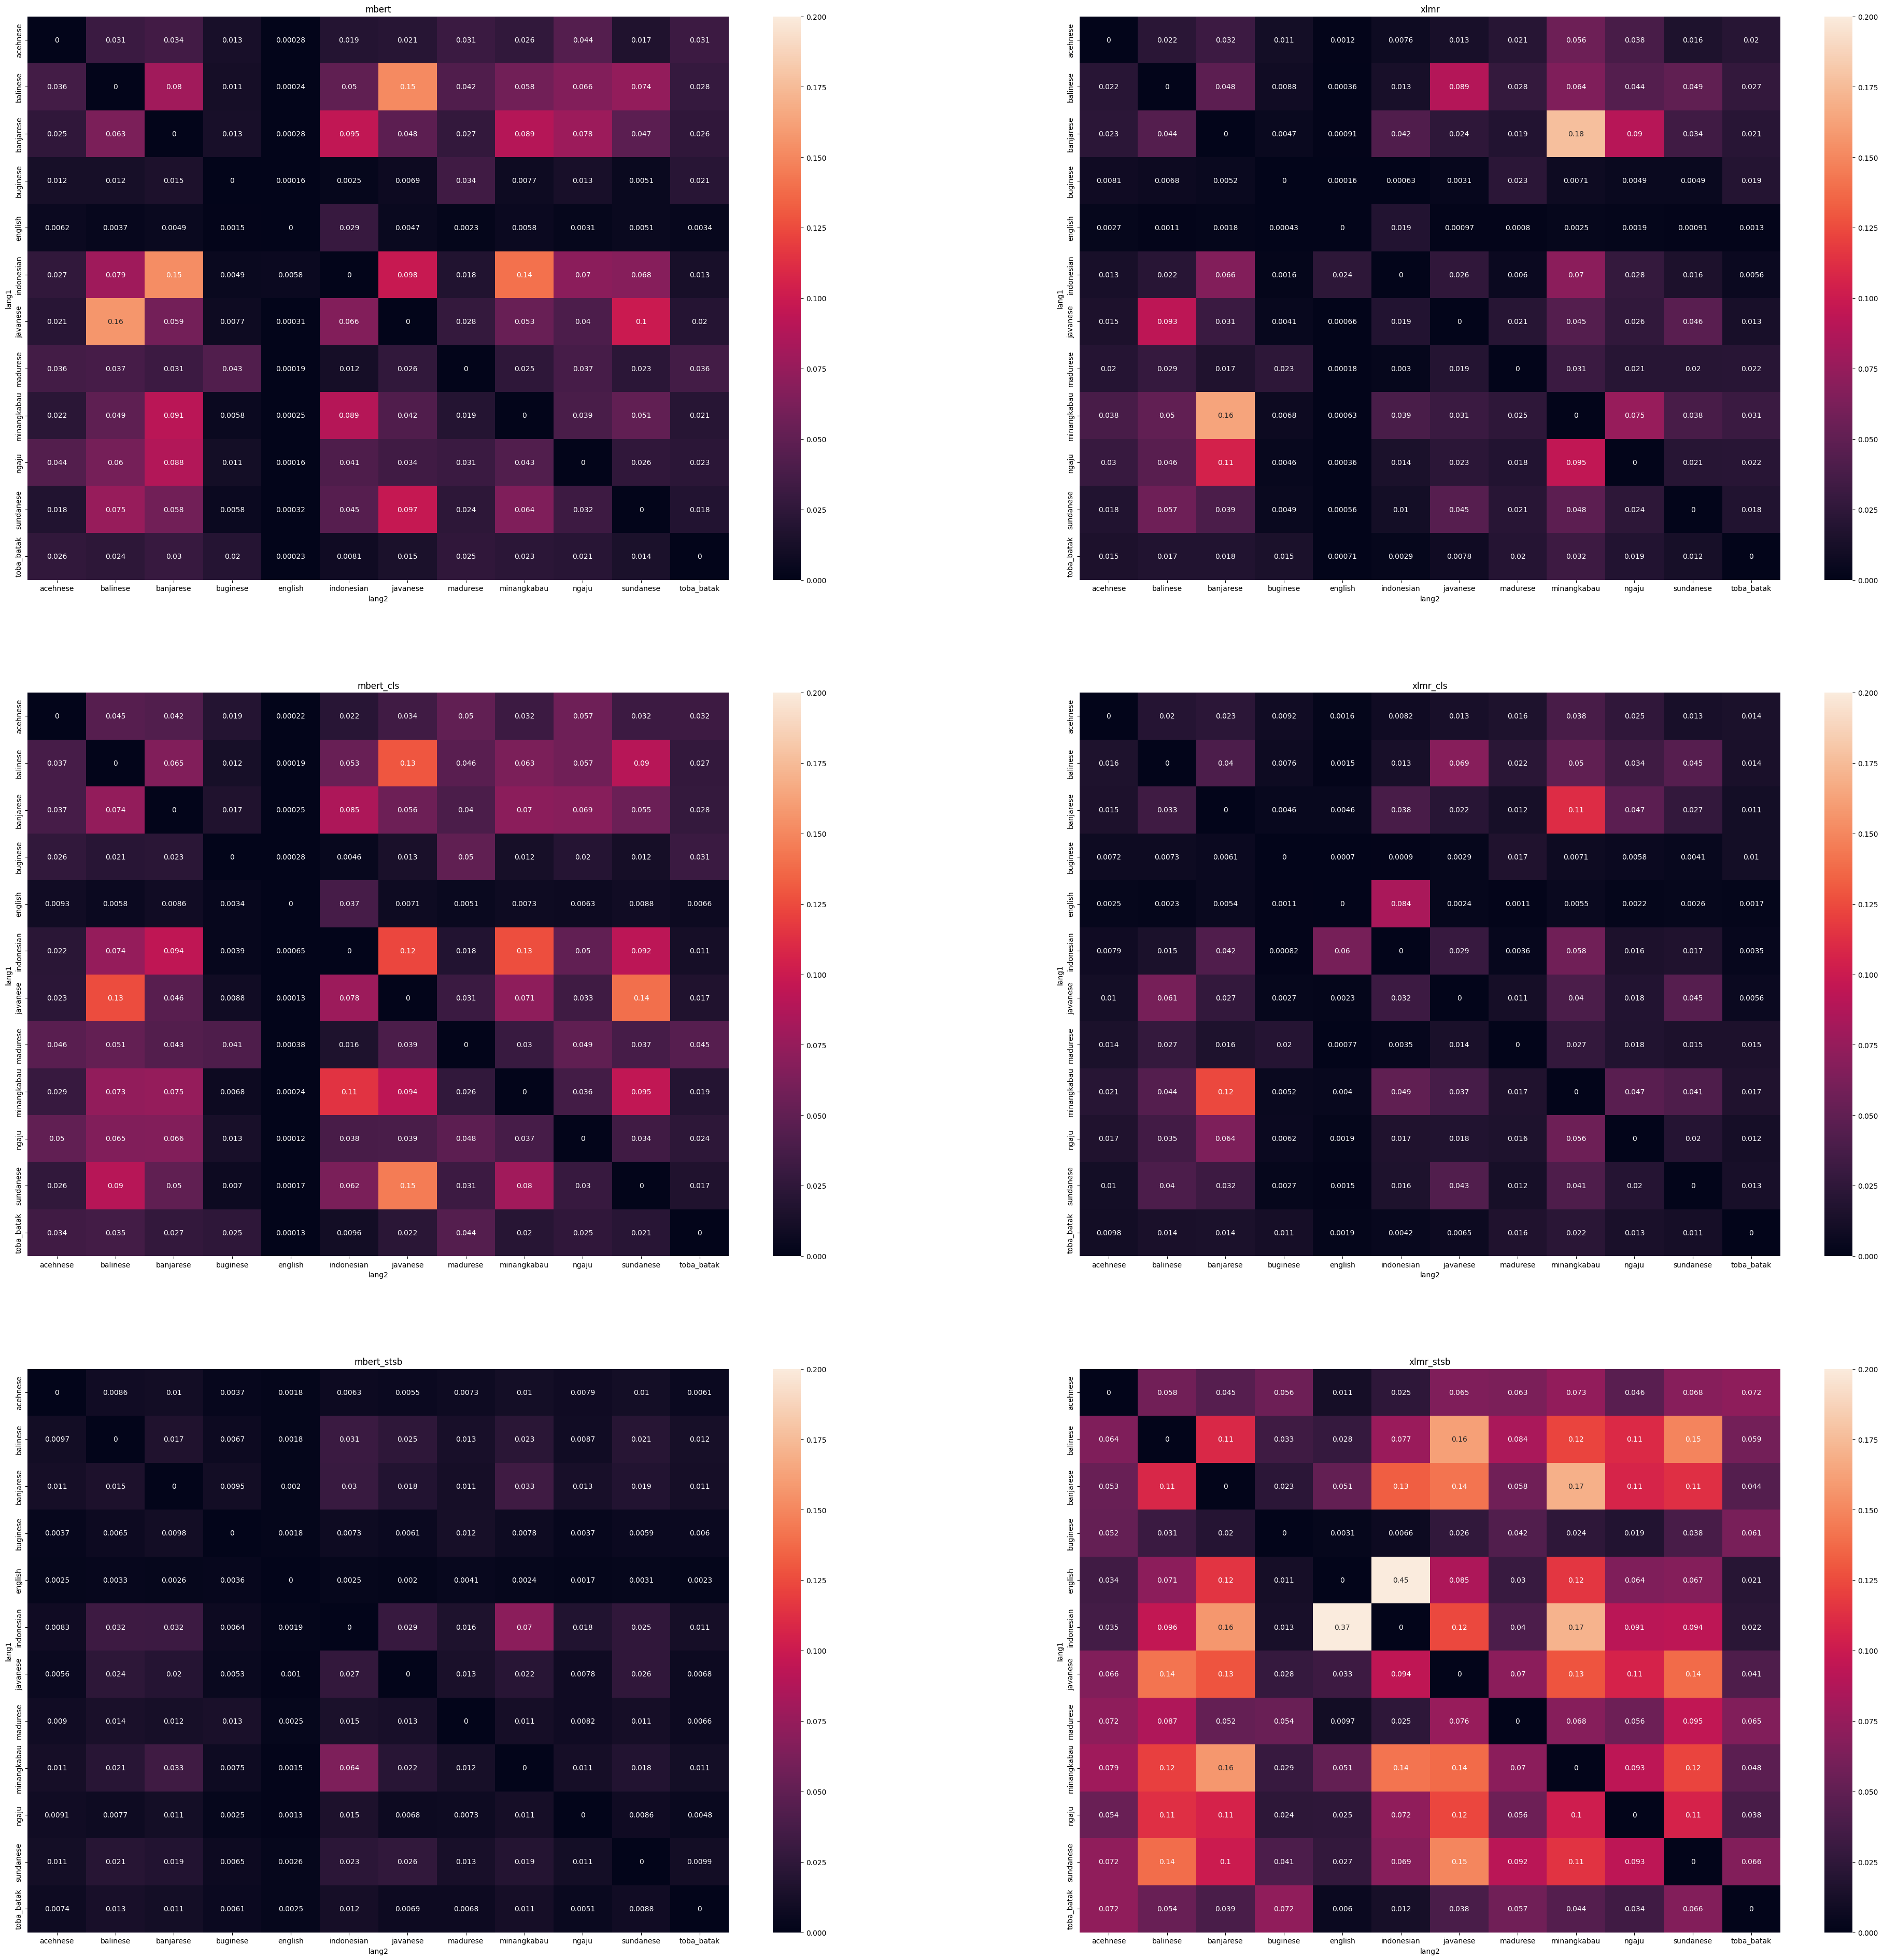

In [1155]:
heatmaps_fig, heatmaps_ax = plt.subplots(figsize=(48, 48), ncols=2, nrows=3)
row_col_iterable = it.product(range(3), range(2))

g_heat = (
    nusax_mrr_results[nusax_mrr_results.model == model]
        .set_index(['lang1', 'lang2'])
        .mrr.unstack() 
    for model in model_names
)

for model, (i, j) in zip(model_names, row_col_iterable):
    df_heat = next(g_heat)    
    sns.heatmap(df_heat, ax=heatmaps_ax[i][j], annot=True, vmin=0, vmax=.2)
    heatmaps_ax[i][j].set_title(model)

In [1136]:
nusax_mrr_results

dataset      model       lang1        lang2       mrr
0     nusax      mbert   sundanese    sundanese  0.000000
1     nusax      mbert   sundanese    banjarese  0.057901
2     nusax      mbert   sundanese     acehnese  0.017628
3     nusax      mbert   sundanese     madurese  0.024052
4     nusax      mbert   sundanese     balinese  0.075064
..      ...        ...         ...          ...       ...
859   nusax  xlmr_stsb  indonesian     javanese  0.124171
860   nusax  xlmr_stsb  indonesian  minangkabau  0.170778
861   nusax  xlmr_stsb  indonesian   toba_batak  0.022440
862   nusax  xlmr_stsb  indonesian      english  0.367671
863   nusax  xlmr_stsb  indonesian   indonesian  0.000000

[864 rows x 5 columns]

#### Lets try the same on FLORES

In [1069]:
all_dataset_dfs['flores']

text language  \
0       في يوم الاتنين، علماء من كلية الطب بجامعة ستان...      arz   
1       الباحثين الرئيسيين بيقولوا أن ده ممكن يكشف عن ...      arz   
2       طيارة جاس-39غربين اتحطمت على مدرج الساعة 9:30 ...      arz   
3       تم الإشارة للطيار على أنه قائد السرب ديلوكريت ...      arz   
4       وسائل الإعلام المحلية قالت أن فيه عربية مطافي ...      arz   
...                                                   ...      ...   
195407  يوصل موسم السياحة بمحطات التلال ذروته عامةً خل...      acm   
195408  مع ذلك، يتمتعون بنوع مختلف من الجمال والسحر خل...      acm   
195409  عدد قليل فقط من شركات الطيران بعدها تقدم أسعار...      acm   
195410  من الخطوط الجوية اللي توفر هالشي هي طيران كندا...      acm   
195411  بكل الأحوال، لازم تحجز بالتليفون مباشرة ويه شر...      acm   

        sentence_id  global_sentence_id  
0                 0                   0  
1                 1                   1  
2                 2                   2  
3                 3                   3  
4                 4                   4  
...             ...                 ...  
195407          992              195407  
195408          993              195408  
195409          994              195409  
195410          995              195410  
195411          996              195411  

[195412 rows x 4 columns]

In [1070]:
np.argsort?

In [1073]:
_ = pairwise_distances(featurized_sentences['flores']['mbert'][flores_df.language == 'fin'], featurized_sentences['flores']['mbert'][flores_df.language == 'deu'])

In [1082]:
_keys = np.arange(_.shape[0])

In [1118]:
((np.eye(3)*100)).argsort(1).argsort(1)

array([[2, 0, 1],
       [0, 2, 1],
       [0, 1, 2]])

In [1137]:
from sklearn.metrics import pairwise_distances_chunked
from scipy.stats import rankdata

def mrr_experiment_lang_vs_lang2_pairwise(lang, lang2, embs, df):
    assert embs.shape[0] == df.shape[0]

    # Filter DataFrames by language only once and store them in a dictionary
    lang_dfs = {lang: df[df.language == lang].copy().reset_index(drop=True) for lang in (lang, lang2)}

    embs_lang = embs[lang_dfs[lang].index]
    embs_lang2 = embs[lang_dfs[lang2].index]

    # Use pairwise_distances_chunked to compute pairwise distances in smaller chunks
    distances_iter = pairwise_distances_chunked(embs_lang, embs_lang2, metric="cosine")

    mrr_sum = 0
    count = 0
    for distances_chunk in distances_iter:
        # Compute ranks using rankdata from scipy.stats
        ranks = rankdata(distances_chunk, axis=1) - 1

        sentence_ids = lang_dfs[lang].sentence_id.values
        target_indices = np.where(ranks == sentence_ids[:, np.newaxis])[1]
        mrr_sum += np.sum(1 / (target_indices + 1))
        count += len(target_indices)

    mrr = mrr_sum / count
    return mrr


In [ ]:
rows_mrr_experiment_analysis_pairwise = []
for model_name, dataset_name in it.product(models, ['flores']):
    languages = list(all_dataset_languages[dataset_name])
    language_pairs = [(l1, l2) for l1, l2 in it.product(languages, languages) if l1 != l2]
    for ix, (lang1, lang2) in tqdm(enumerate(language_pairs, start=1), 
                                   desc=f"[{model_name}, {dataset_name}] Computing pairwise MRRs", 
                                   total=len(language_pairs)):
        embeddings = featurized_sentences[dataset_name][model_name]
        df = all_dataset_dfs[dataset_name]
        mrr = mrr_experiment_lang_vs_lang2_pairwise(
            lang1, 
            lang2, 
            embeddings, 
            df
        )
        rows_mrr_experiment_analysis_pairwise.append(
            (dataset_name, model_name, lang1, lang2, mrr)
        )

[mbert, flores] Computing pairwise MRRs:  93%|█████████████████████████▉  | 35483/38220 [1:16:59<05:56,  7.68it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

[mbert_cls, flores] Computing pairwise MRRs:  56%|██████████████▌           | 21328/38220 [46:12<36:34,  7.70it/s]

In [1147]:
flores_mrr_results = pd.DataFrame(rows_mrr_experiment_analysis_pairwise, columns="dataset, model, lang1, lang2, mrr".split(", "))

In [1379]:
def _mrr_experiment_lang_vs_lang2_pairwise(lang, lang2, embs, df):
    assert embs.shape[0] == df.shape[0]

    # Filter DataFrames by language only once and store them in a dictionary
    lang_dfs = {lang: df[df.language == lang].copy().reset_index(drop=True) for lang in (lang, lang2)}

    embs_lang = embs[lang_dfs[lang].global_sentence_id]
    embs_lang2 = embs[lang_dfs[lang2].global_sentence_id]

    # Use pairwise_distances_chunked to compute pairwise distances in smaller chunks
    distances_iter = pairwise_distances_chunked(embs_lang, embs_lang2, metric="cosine")

    mrr_sum = 0
    count = 0
    for distances_chunk in distances_iter:
        # Compute ranks using rankdata from scipy.stats
        ranks = rankdata(distances_chunk, axis=1) - 1

        sentence_ids = lang_dfs[lang].sentence_id.values
        target_indices = np.where(ranks == sentence_ids[:, np.newaxis])[1]
        mrr_sum += np.sum(1 / (target_indices + 1))
        count += len(target_indices)

    mrr = mrr_sum / count
    return mrr


In [1391]:
def get_mrrs_for_language_flores(lang):
    print(lang)
    uniq_langs = flores_df.language.unique()
    return pd.Series([
        _mrr_experiment_lang_vs_lang2_pairwise(
            lang, lg, X_flores_sentences, flores_df
        ) 
        for lg in uniq_langs
    ])

In [1382]:
flores_langs = list(flores_df.language.unique())

In [1383]:
import multiprocessing as mp

In [1393]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

In [1390]:
with mp.Pool(processes=20) as pool:
    flores_mrrs = pool.map(get_mrrs_for_language_flores, flores_langs)

In [1394]:
_flores_fin_mrrs = get_mrrs_for_language_flores('fin')

In [1370]:
_flores_fin_mrrs = [_mrr_experiment_lang_vs_lang2_pairwise('fin', lg, X_flores_sentences, flores_df) for lg in tqdm(flores_df.language.unique())]

100%|███████████████████████████████████████████████████████████████████████████| 196/196 [00:25<00:00,  7.78it/s]


In [1372]:
_flores_fin_mrrs = pd.Series(_flores_fin_mrrs)

In [1375]:
_flores_fin_mrrs

0      0.009827
1      0.010021
2      0.008372
3      0.007207
4      0.009519
         ...   
191    0.010957
192    0.007304
193    0.009223
194    0.009583
195    0.011421
Length: 196, dtype: float64

In [1240]:
%ls

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
01_exploratory_data_analysis.ipynb
02_data_loading_distances_and_experiments.ipynb
03_datasets_groupby.ipynb
04_lid_bigram_baseline.ipynb
04_same_sent_experiment_results.ipynb
04_same_sent_experiment_results.ipynb.bak
05_detecting_romanized_languages.ipynb
05_lid_bigram_baseline.ipynb
07_parallel_sentence_mining_mrr.ipynb
08_where_do_things_occur.ipynb
img/
nusax_mrr_results.tsv
obsolete/
retrieval_featurized_sentences_flores_nusax_ntrex.pkl
same_sentence_results/


<Axes: ylabel='Frequency'>

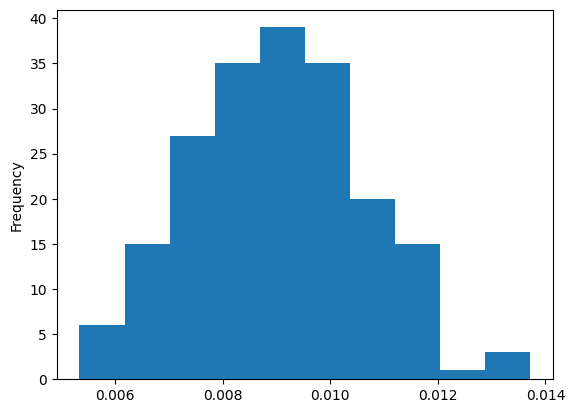

In [1239]:
_flores_fin_mrrs.plot(kind='hist')

<Axes: ylabel='Frequency'>

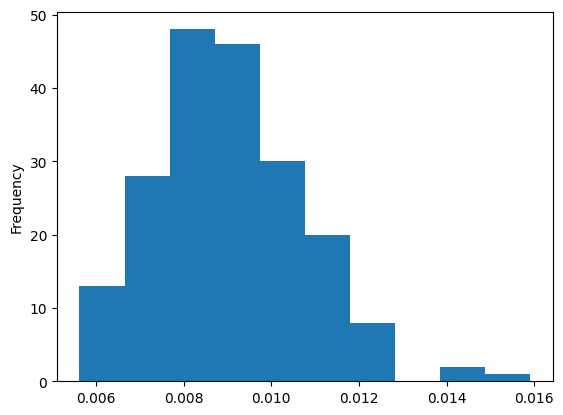

In [1236]:
_flores_fin_mrrs.plot(kind='hist')

In [1229]:
1/997

0.0010030090270812437

In [1222]:
__

0.010489133766986874

## Average similarity plot

In [1297]:
def get_pairwise_distances_across_sentences(X, df, should_stack=False):
    distance_matrices = []
     
    max_sid = df.groupby('language').sentence_id.max().min()
    for sid in tqdm(range(max_sid), total=max_sid):
        dm = pairwise_distances(X[df.sentence_id == sid], metric='cosine')
        distance_matrices.append(dm)
    
    if should_stack:
        return np.stack(distance_matrices)
    else:
        return distance_matrices

# pdist = get_pairwise_distances_across_sentences(X_flores_sentences, flores_df, should_stack=True)

In [1358]:
def plot_avg_similarity(dataset_name, model_name, languages, sort_lang='eng', ax=None, ylim=None):
    X = featurized_sentences[dataset_name][model_name]
    df = all_dataset_dfs[dataset_name]
    pdist = get_pairwise_distances_across_sentences(X, df, should_stack=True)
    average_lang_similarity_df = 1 - pd.DataFrame(
        pdist.mean(axis=0), 
        columns=languages, 
        index=languages
    )
    
    ax_dict = {'ax': ax} if ax else {}
    ylim_dict = {'ylim': ylim} if ylim else {}
    
    average_lang_similarity_df\
        .sort_values(sort_lang, ascending=False)\
        .plot(figsize=(12,6), 
              title=f"[{model_name}, {dataset_name}] Cos sim (x-axis ordered by '{sort_lang}' similarity)", 
              alpha=0.05, c='k', legend=None, **ax_dict, **ylim_dict)

100%|██████████████████████████████████████████████████████████████████████████| 996/996 [00:06<00:00, 144.60it/s]


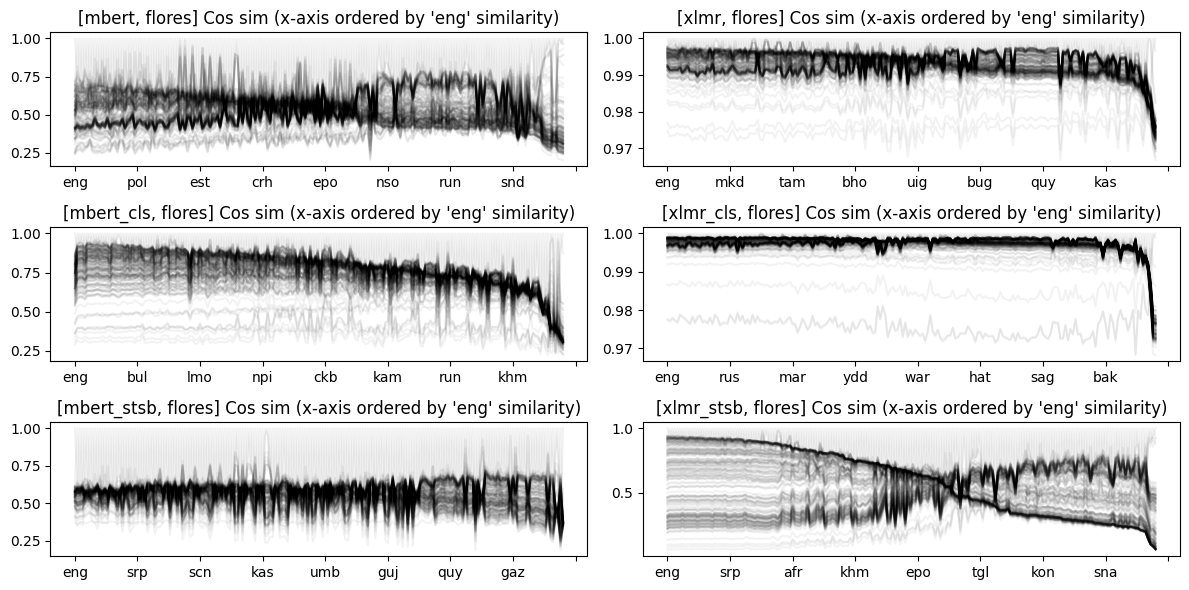

In [1269]:
fig, ax = plt.subplots(figsize=(48, 60), nrows=3, ncols=2)
for model_name, _ax in zip(models, ax.flat):
    plot_avg_similarity("flores", model_name, languages_rows_cols, ax=_ax)

plt.tight_layout()

1996

In [1290]:
pairwise_distances(featurized_sentences['ntrex']['mbert'][all_dataset_dfs['ntrex'].sentence_id == 5]).shape

(98, 98)

mbert


100%|████████████████████████████████████████████████████████████████████████| 1996/1996 [00:02<00:00, 859.47it/s]


xlmr


100%|████████████████████████████████████████████████████████████████████████| 1996/1996 [00:02<00:00, 886.07it/s]


mbert_cls


100%|████████████████████████████████████████████████████████████████████████| 1996/1996 [00:08<00:00, 232.37it/s]


xlmr_cls


100%|████████████████████████████████████████████████████████████████████████| 1996/1996 [00:02<00:00, 786.14it/s]


mbert_stsb


100%|████████████████████████████████████████████████████████████████████████| 1996/1996 [00:03<00:00, 644.25it/s]


xlmr_stsb


100%|████████████████████████████████████████████████████████████████████████| 1996/1996 [00:07<00:00, 253.68it/s]


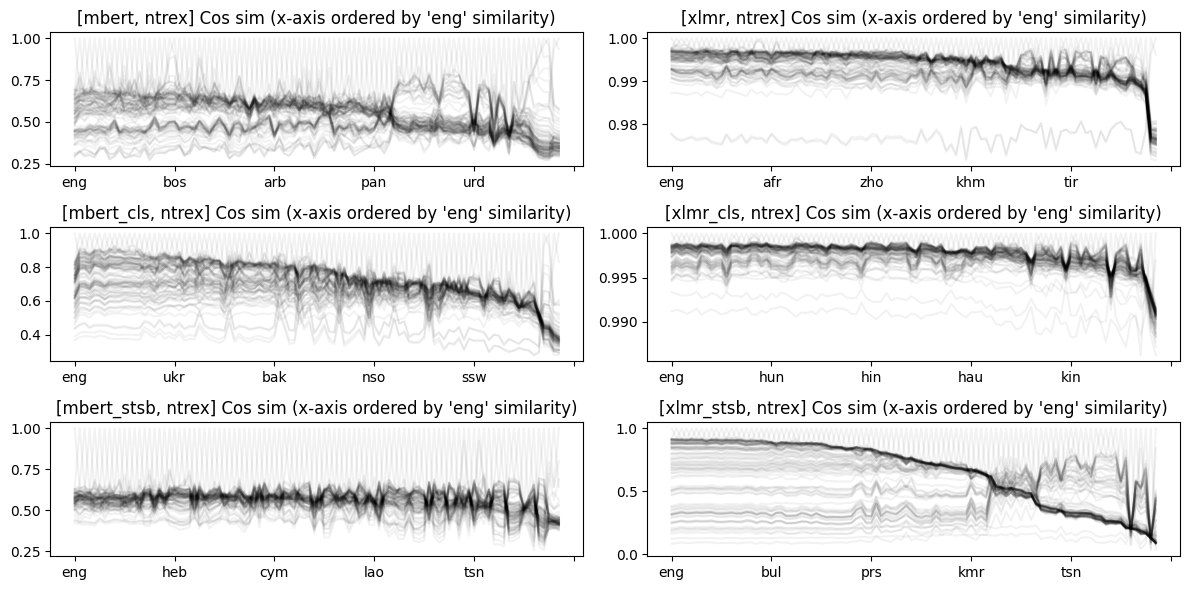

In [1298]:
fig, ax = plt.subplots(figsize=(48, 60), nrows=3, ncols=2)
for model_name, _ax in zip(models, ax.flat):
    print(model_name)
    plot_avg_similarity("ntrex", model_name, languages_rows_cols_ntrex, ax=_ax)

plt.tight_layout()

In [1302]:
nusax_df.language.unique()

array(['banjarese', 'madurese', 'buginese', 'toba_batak', 'ngaju',
       'sundanese', 'minangkabau', 'javanese', 'acehnese', 'english',
       'balinese', 'indonesian'], dtype=object)

mbert


100%|█████████████████████████████████████████████████████████████████████████| 999/999 [00:00<00:00, 3998.71it/s]


xlmr


100%|█████████████████████████████████████████████████████████████████████████| 999/999 [00:00<00:00, 3957.23it/s]


mbert_cls


100%|█████████████████████████████████████████████████████████████████████████| 999/999 [00:00<00:00, 3955.25it/s]


xlmr_cls


100%|█████████████████████████████████████████████████████████████████████████| 999/999 [00:00<00:00, 3942.42it/s]


mbert_stsb


100%|█████████████████████████████████████████████████████████████████████████| 999/999 [00:00<00:00, 3922.78it/s]


xlmr_stsb


100%|█████████████████████████████████████████████████████████████████████████| 999/999 [00:00<00:00, 3782.17it/s]


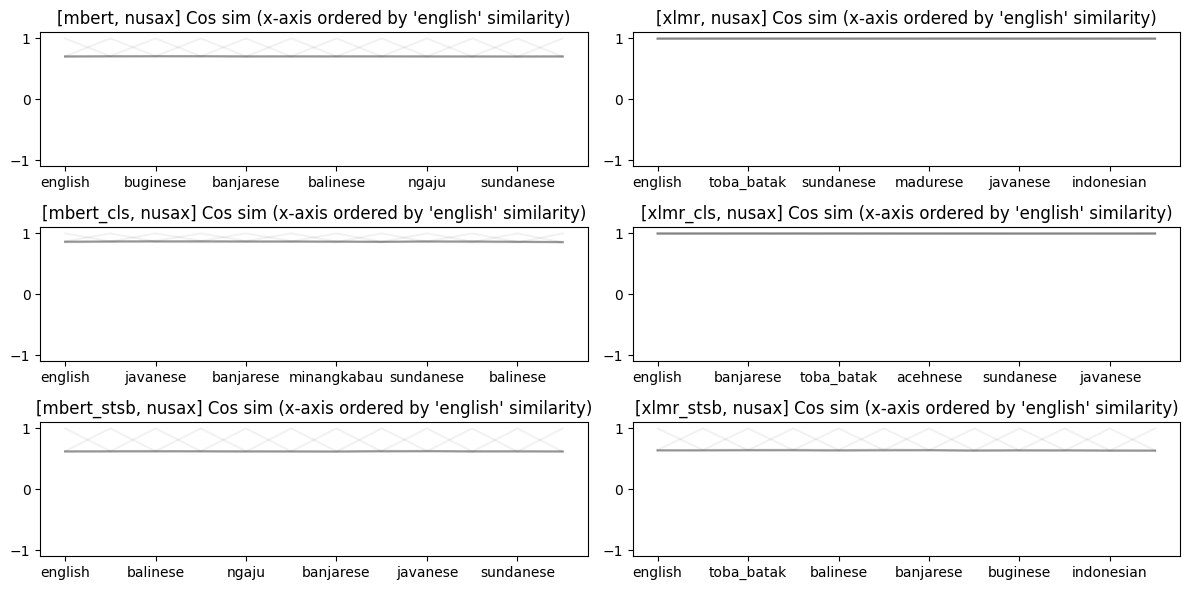

In [1365]:
fig, ax = plt.subplots(figsize=(48, 60), nrows=3, ncols=2)
for model_name, _ax in zip(models, ax.flat):
    print(model_name)
    plot_avg_similarity("nusax", model_name, nusax_df.language.unique(), ax=_ax, sort_lang="english", ylim=(-1.1, 1.1))

plt.tight_layout()

In [1347]:
def get_average_lang_similarity_df(dataset_name, model_name, languages, sort_lang='eng', ax=None):
    X = featurized_sentences[dataset_name][model_name]
    df = all_dataset_dfs[dataset_name]
    pdist = get_pairwise_distances_across_sentences(X, df, should_stack=True)
    average_lang_similarity_df = 1 - pd.DataFrame(
        pdist.mean(axis=0), 
        columns=languages, 
        index=languages
    )
    return average_lang_similarity_df

def plot_average_lang_similarity_heatmaps(dataset_name, model_name, languages, sort_lang='eng', ax=None):
    average_lang_similarity_df = get_average_lang_similarity_df(dataset_name, model_name, languages, sort_lang='eng', ax=None)
    ax_dict = {'ax': ax} if ax else {}
    
    average_lang_similarity_df\
        .sort_values(sort_lang, ascending=False)\
        .plot(figsize=(12,6), 
              title=f"[{model_name}, {dataset_name}] Cos sim (x-axis ordered by '{sort_lang}' similarity)", 
              alpha=0.05, c='k', legend=None, **ax_dict)

In [1348]:
avg_sim_dfs = []
for model_name, _ax in zip(models, ax.flat):
    print(model_name)
    avg_sim_df = get_average_lang_similarity_df('nusax', model, nusax_df.language.unique()).stack().reset_index()
    avg_sim_df.columns = ['query_lang', 'corpus_lang', 'cos_sim']
    avg_sim_df['model'] = model_name
    avg_sim_dfs.append(avg_sim_df)

mbert


100%|█████████████████████████████████████████████████████████████████████████| 999/999 [00:00<00:00, 3992.97it/s]


xlmr


100%|█████████████████████████████████████████████████████████████████████████| 999/999 [00:00<00:00, 3983.02it/s]


mbert_cls


100%|█████████████████████████████████████████████████████████████████████████| 999/999 [00:00<00:00, 3969.91it/s]


xlmr_cls


100%|█████████████████████████████████████████████████████████████████████████| 999/999 [00:00<00:00, 3965.71it/s]


mbert_stsb


100%|█████████████████████████████████████████████████████████████████████████| 999/999 [00:00<00:00, 3967.15it/s]


xlmr_stsb


100%|█████████████████████████████████████████████████████████████████████████| 999/999 [00:00<00:00, 3969.04it/s]


In [1349]:
avg_sim_df_all = pd.concat(avg_sim_dfs)

```
g = sns.FacetGrid(tips, row="smoker", col="time", margin_titles=True)
g.map(sns.regplot, "size", "total_bill", color=".3", fit_reg=False, x_jitter=.1)
```

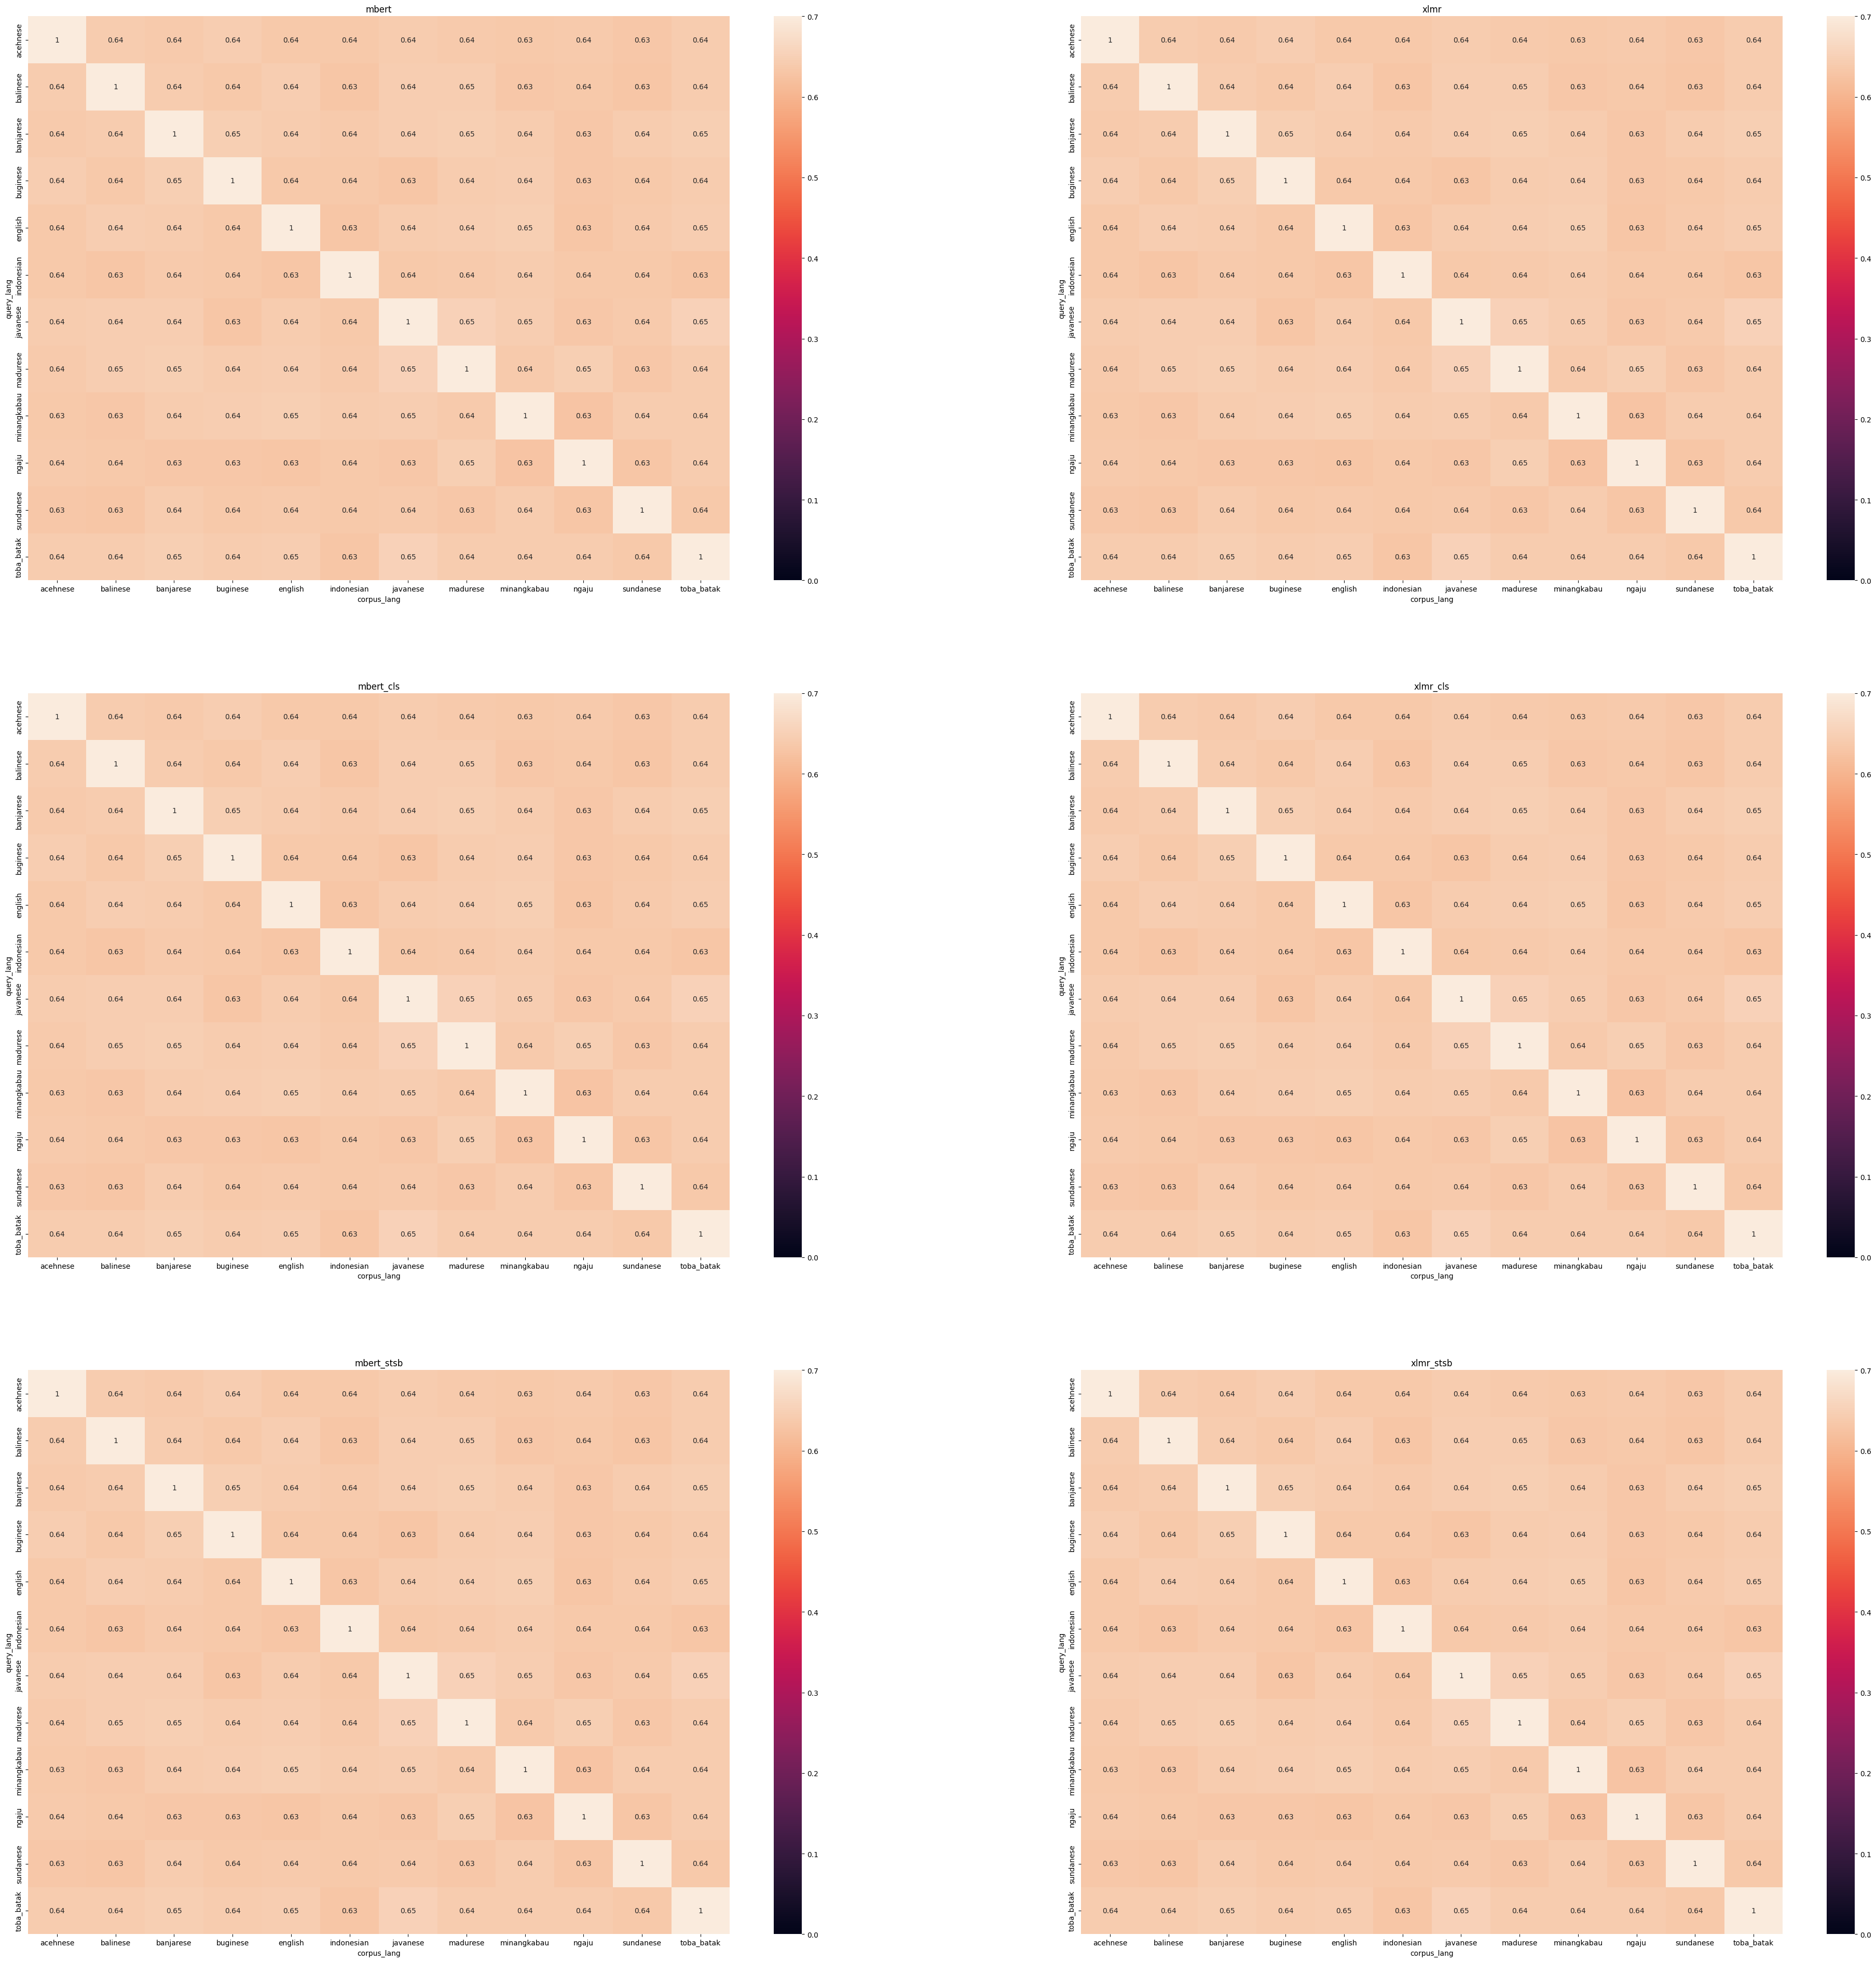

In [1357]:
heatmaps_fig, heatmaps_ax = plt.subplots(figsize=(48, 48), ncols=2, nrows=3)
row_col_iterable = it.product(range(3), range(2))

g_heat = (
    avg_sim_df_all[avg_sim_df_all.model == model]
        .set_index(['query_lang', 'corpus_lang'])
        .cos_sim.unstack() 
    for model in model_names
)

for model, (i, j) in zip(model_names, row_col_iterable):
    df_heat = next(g_heat)
    sns.heatmap(df_heat, ax=heatmaps_ax[i][j], annot=True, vmin=0, vmax=0.7)
    heatmaps_ax[i][j].set_title(model)

In [1321]:
___ =get_average_lang_similarity_df('nusax', 'mbert_cls', nusax_df.language.unique())

100%|█████████████████████████████████████████████████████████████████████████| 999/999 [00:00<00:00, 3928.61it/s]


In [1316]:
___ = ___.stack().reset_index()

In [1317]:
___.columns = ['query_lang', 'corpus_lang', 'cos_sim']

In [1323]:
___

banjarese  madurese  buginese  toba_batak     ngaju  sundanese  \
banjarese     1.000000  0.858685  0.874289    0.874238  0.861123   0.865793   
madurese      0.858685  1.000000  0.861403    0.863553  0.860069   0.861282   
buginese      0.874289  0.861403  1.000000    0.863718  0.860069   0.870952   
toba_batak    0.874238  0.863553  0.863718    1.000000  0.852007   0.866422   
ngaju         0.861123  0.860069  0.860069    0.852007  1.000000   0.856443   
sundanese     0.865793  0.861282  0.870952    0.866422  0.856443   1.000000   
minangkabau   0.863607  0.858719  0.866773    0.867651  0.856693   0.868218   
javanese      0.872516  0.862011  0.866175    0.873368  0.859504   0.876696   
acehnese      0.875579  0.866317  0.872527    0.871659  0.853433   0.871182   
english       0.866647  0.861392  0.865447    0.859099  0.850256   0.860744   
balinese      0.863566  0.861264  0.860880    0.858110  0.850746   0.865785   
indonesian    0.865418  0.863013  0.871198    0.862559  0.860528   0.871764   

             minangkabau  javanese  acehnese   english  balinese  indonesian  
banjarese       0.863607  0.872516  0.875579  0.866647  0.863566    0.865418  
madurese        0.858719  0.862011  0.866317  0.861392  0.861264    0.863013  
buginese        0.866773  0.866175  0.872527  0.865447  0.860880    0.871198  
toba_batak      0.867651  0.873368  0.871659  0.859099  0.858110    0.862559  
ngaju           0.856693  0.859504  0.853433  0.850256  0.850746    0.860528  
sundanese       0.868218  0.876696  0.871182  0.860744  0.865785    0.871764  
minangkabau     1.000000  0.870438  0.868424  0.861724  0.857860    0.864360  
javanese        0.870438  1.000000  0.876645  0.869112  0.864827    0.864352  
acehnese        0.868424  0.876645  1.000000  0.867281  0.862264    0.870855  
english         0.861724  0.869112  0.867281  1.000000  0.857686    0.869208  
balinese        0.857860  0.864827  0.862264  0.857686  1.000000    0.869162  
indonesian      0.864360  0.864352  0.870855  0.869208  0.869162    1.000000

<Axes: >

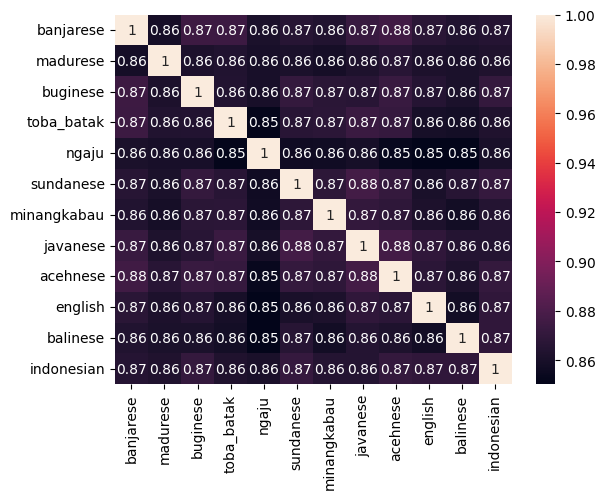

In [1312]:
fg = sns.FacetGrid(data=___, col=)

In [1281]:
__ = get_pairwise_distances_across_sentences(featurized_sentences['ntrex']['mbert'], 
                                        all_dataset_dfs['ntrex'], should_stack=False)

100%|████████████████████████████████████████████████████████████████████████| 2041/2041 [00:05<00:00, 393.14it/s]


In [ ]:
featurized_sentences['ntrex']

In [1282]:
{a.shape for a in __}

{(1, 1), (2, 2), (3, 3), (6, 6), (98, 98)}

100%|██████████████████████████████████████████████████████████████████████████| 996/996 [00:04<00:00, 245.19it/s]


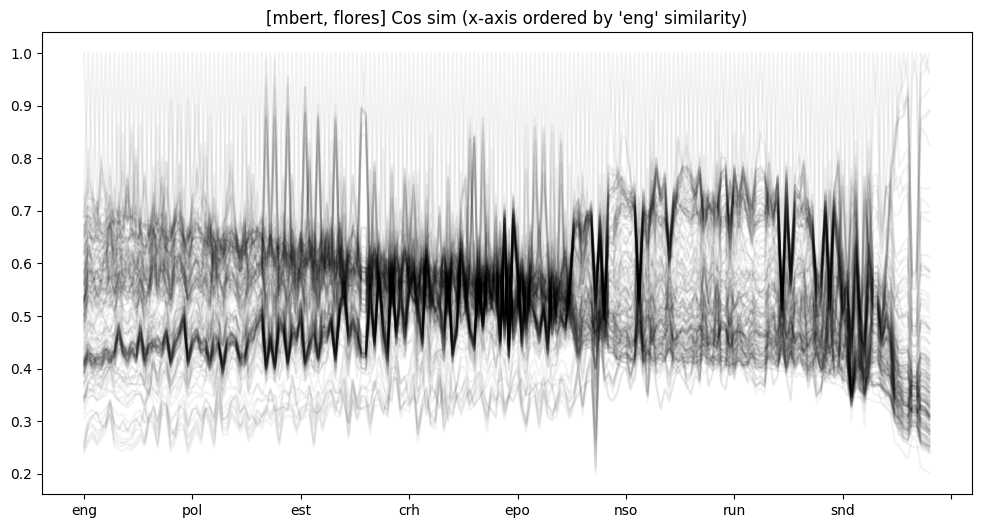

In [1255]:
plot_avg_similarity('flores', 'mbert', languages_rows_cols)

100%|██████████████████████████████████████████████████████████████████████████| 996/996 [00:02<00:00, 334.30it/s]


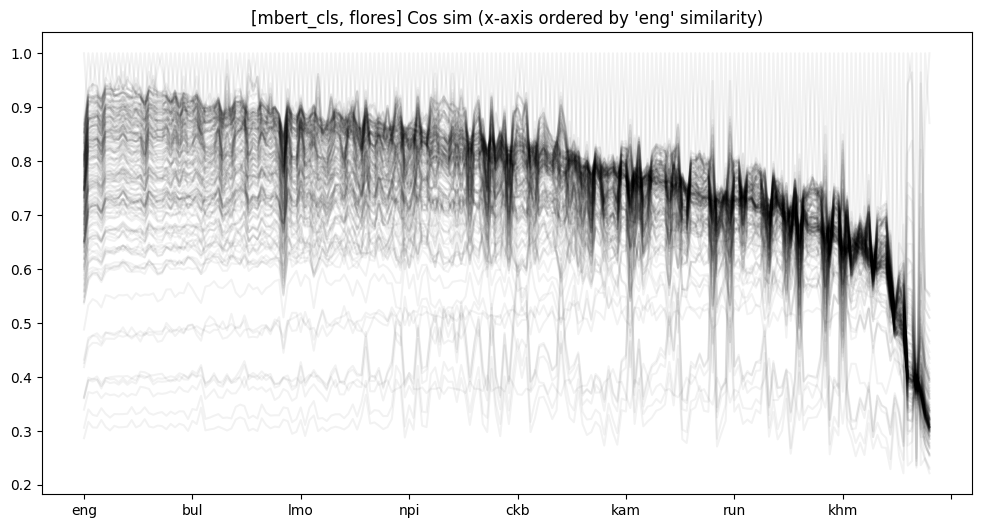

In [1256]:
plot_avg_similarity('flores', 'mbert_cls', languages_rows_cols)

100%|██████████████████████████████████████████████████████████████████████████| 996/996 [00:04<00:00, 212.26it/s]


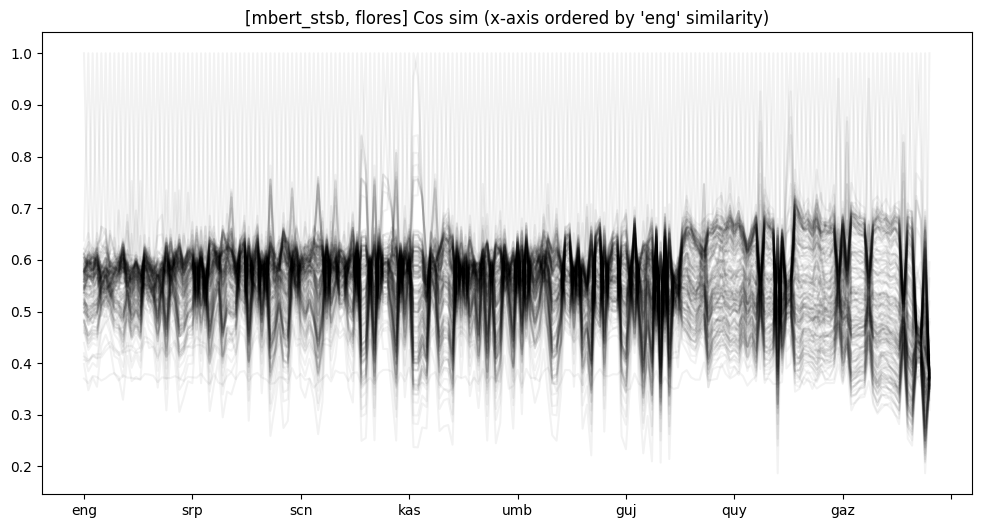

In [1257]:
plot_avg_similarity('flores', 'mbert_stsb', languages_rows_cols)

100%|██████████████████████████████████████████████████████████████████████████| 996/996 [00:04<00:00, 203.27it/s]


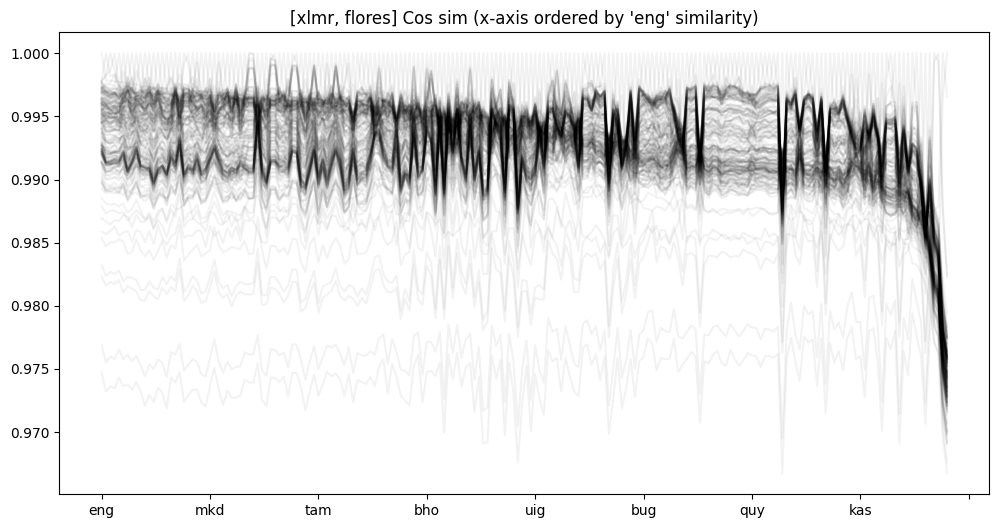

In [1258]:
plot_avg_similarity('flores', 'xlmr', languages_rows_cols)

100%|██████████████████████████████████████████████████████████████████████████| 996/996 [00:01<00:00, 681.55it/s]


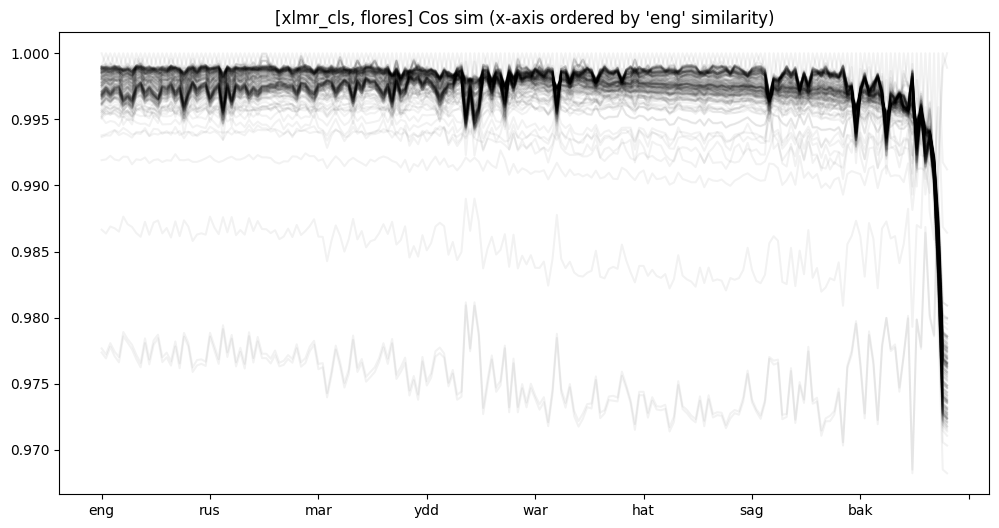

In [1259]:
plot_avg_similarity('flores', 'xlmr_cls', languages_rows_cols)

100%|██████████████████████████████████████████████████████████████████████████| 996/996 [00:04<00:00, 201.00it/s]


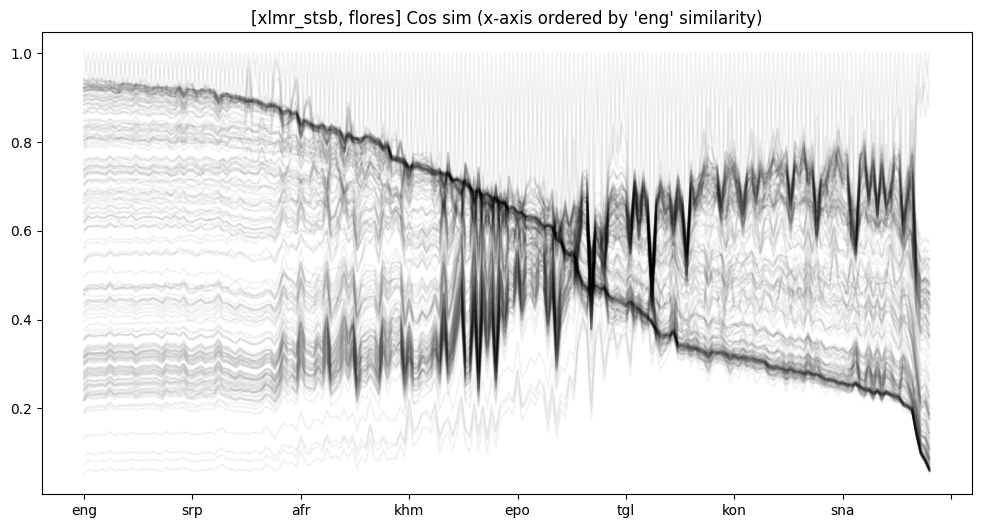

In [1260]:
plot_avg_similarity('flores', 'xlmr_stsb', languages_rows_cols)

### Lets analyze the MRR results

In [ ]:
average_lang_similarity_df = pd.DataFrame(pdist.mean(axis=0), columns=languages_rows_cols, index=languages_rows_cols)

arz       aeb       cat       gla       snd       taq       ell  \
arz  1.000000  0.864280  0.838529  0.264112  0.710121  0.358693  0.843837   
aeb  0.864280  1.000000  0.815162  0.286892  0.702681  0.379268  0.822637   
cat  0.838529  0.815162  1.000000  0.250479  0.728298  0.339869  0.905164   
gla  0.264112  0.286892  0.250479  1.000000  0.281078  0.687042  0.252212   
snd  0.710121  0.702681  0.728298  0.281078  1.000000  0.343439  0.735018   
..        ...       ...       ...       ...       ...       ...       ...   
hne  0.773650  0.762253  0.788524  0.330052  0.694386  0.420573  0.785801   
lij  0.662857  0.662812  0.692294  0.437978  0.610214  0.515051  0.672960   
lvs  0.842208  0.819144  0.910879  0.249281  0.735914  0.341112  0.899559   
tuk  0.484455  0.499681  0.469403  0.531382  0.474118  0.593518  0.472293   
acm  0.891448  0.879995  0.862627  0.256193  0.724090  0.344007  0.867422   

          jav       dik       dyu  ...       ltg       tpi       nno  \
arz  0.659732  0.374380  0.286718  ...  0.602708  0.473780  0.801002   
aeb  0.660743  0.396561  0.305063  ...  0.604481  0.489761  0.782503   
cat  0.666922  0.362837  0.271634  ...  0.608566  0.467150  0.867047   
gla  0.421013  0.627180  0.615593  ...  0.391628  0.622213  0.291689   
snd  0.597576  0.361991  0.279327  ...  0.557604  0.427056  0.711529   
..        ...       ...       ...  ...       ...       ...       ...   
hne  0.675217  0.434889  0.351767  ...  0.616319  0.531119  0.768880   
lij  0.674785  0.524110  0.442299  ...  0.647392  0.600423  0.702803   
lvs  0.661695  0.362131  0.271028  ...  0.626728  0.465978  0.858681   
tuk  0.588515  0.570787  0.516539  ...  0.596720  0.602233  0.507599   
acm  0.655195  0.363990  0.273822  ...  0.601549  0.466309  0.816793   

          azb       hne       lij       lvs       tuk       acm  ratio  
arz  0.568423  0.773650  0.662857  0.842208  0.484455  0.891448    NaN  
aeb  0.578676  0.762253  0.662812  0.819144  0.499681  0.879995    NaN  
cat  0.543655  0.788524  0.692294  0.910879  0.469403  0.862627    NaN  
gla  0.471765  0.330052  0.437978  0.249281  0.531382  0.256193    NaN  
snd  0.540754  0.694386  0.610214  0.735914  0.474118  0.724090    NaN  
..        ...       ...       ...       ...       ...       ...    ...  
hne  0.606213  1.000000  0.675703  0.789587  0.530280  0.780684    NaN  
lij  0.608979  0.675703  1.000000  0.680155  0.596161  0.661355    NaN  
lvs  0.551388  0.789587  0.680155  1.000000  0.477701  0.865153    NaN  
tuk  0.582847  0.530280  0.596161  0.477701  1.000000  0.477383    NaN  
acm  0.562108  0.780684  0.661355  0.865153  0.477383  1.000000    NaN  

[196 rows x 197 columns]

In [1396]:
flores_mrr_results

dataset      model lang1 lang2       mrr
0       flores      mbert   afr   plt  0.008756
1       flores      mbert   afr   awa  0.008756
2       flores      mbert   afr   uzn  0.008756
3       flores      mbert   afr   tso  0.008756
4       flores      mbert   afr   tzm  0.008756
...        ...        ...   ...   ...       ...
229315  flores  xlmr_stsb   hrv   fon  0.010539
229316  flores  xlmr_stsb   hrv   srd  0.010539
229317  flores  xlmr_stsb   hrv   fur  0.010539
229318  flores  xlmr_stsb   hrv   ary  0.010539
229319  flores  xlmr_stsb   hrv   cjk  0.010539

[229320 rows x 5 columns]

In [864]:
list(np.argsort(c[0])).index(0)

1

In [1059]:
featurized_sentences['flores']['mbert_cls'].shape

(195412, 768)

In [808]:
all_dataset_dfs['nusax'].shape

(12000, 4)

In [616]:
from sentence_transformers.util import semantic_search

In [713]:
from sentence_transformers import evaluation

In [ ]:
# _fin_queries_flores = flores_df[flores_df.language == 'fin'].text.to_dict()

In [ ]:
# _fin_queries_flores

In [ ]:
# relevant_docs_sid_to_gsids = flores_df[flores_df.language != 'fin'].groupby('sentence_id').global_sentence_id.unique().to_dict()

In [ ]:
# fin_flores = flores_df[flores_df.language == 'fin'].copy()

In [ ]:
# fin_flores['relevant_gsids'] = fin_flores.sentence_id.apply(relevant_docs_sid_to_gsids.get)

In [ ]:
# _fin_relevant_ids = dict(zip(fin_flores.global_sentence_id, fin_flores.relevant_gsids.apply(lambda a: set(a))))

In [ ]:
# _non_fin_corpus = flores_df[flores_df.language == 'est'].text.to_dict()

In [ ]:
# ie_evaluator = evaluation.InformationRetrievalEvaluator(
#     queries=_fin_queries_flores, 
#     corpus=_non_fin_corpus,
#     relevant_docs=_fin_relevant_ids,
# )

In [ ]:
# ie_evaluator.compute_metrics?

In [ ]:
# ie_evaluator(models['mbert_stsb'])

In [ ]:
# finnish_embds = X_flores_sentences[flores_df.language == 'fin']

In [ ]:
# _queries = flores_df

In [ ]:
# help(semantic_search)

In [ ]:
# _query_embeddings = X_flores_sentences[flores_df.language == 'fin']

In [ ]:
# _corpus_embeddings = X_flores_sentences[flores_df.language == 'fin']

In [ ]:
# _semsearch_results = semantic_search(_query_embeddings, X_flores_sentences)

In [809]:
# import itertools as it

In [ ]:
def flatten(nested):
    return list(it.chain.from_iterable(nested))

In [ ]:
# _semsearch_results_df = pd.DataFrame.from_dict(flatten(_semsearch_results))

In [ ]:
# _semsearch_results_df.shape

### XLM-R

In [ ]:
from sentence_transformers.models import Transformer, Pooling

In [11]:
from sentence_transformers import SentenceTransformer

In [12]:
xlmr_multilingual = SentenceTransformer('sentence-transformers/stsb-xlm-r-multilingual') 

In [471]:
xlmr_multilingual_modules = list(xlmr_multilingual[0].modules())

In [472]:
xlmr_sentence_transformer = xlmr_multilingual_modules[1]

and let's compare to a regular XLM-R

In [497]:
from transformers import AutoModel

In [477]:
same_model = str(AutoModel.from_pretrained("xlm-roberta-base")) == str(xlmr_sentence_transformer)
print("Are XLM-R from HF and SentenceTransformers the same model? {}".format(same_model))

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaModel: ['lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing XLMRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Are XLM-R from HF and SentenceTransformers the same model? True


In [13]:
import numpy as np

In [14]:
flores_sentences = flores['text']

In [503]:
X_flores_sentences = xlmr_multilingual.encode(flores_sentences, show_progress_bar=True)

Batches:   0%|          | 0/6107 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [16]:
ntrex_sentences = ntrex['text']

In [17]:
X_ntrex_sentences = xlmr_multilingual.encode(ntrex_sentences, show_progress_bar=True)

Batches:   0%|          | 0/6120 [00:00<?, ?it/s]

In [18]:
X_ntrex_sentences.shape

(195810, 768)

In [19]:
flores_languages = flores['language']

In [20]:
flores_df = flores.to_pandas()

In [21]:
flores_df['global_sentence_id'] = range(flores_df.shape[0])

In [22]:
global_sent_id_to_emb = {
    gsid: emb
    for gsid, emb
    in enumerate(X_flores_sentences)
}

In [104]:
ntrex_df = ntrex.to_pandas()

In [105]:
ntrex_df['global_sentence_id'] = range(ntrex_df.shape[0])

In [106]:
global_sent_id_to_emb_ntrex = {
    gsid: emb
    for gsid, emb
    in enumerate(X_ntrex_sentences)
}

In [23]:
import seaborn as sns

In [107]:
languages_rows_cols = flores_df[flores_df.sentence_id == 0].language.tolist()
languages_rows_cols_ntrex = ntrex_df[ntrex_df.sentence_id == 0].language.tolist()

In [108]:
import pandas as pd

In [109]:
from sklearn.metrics import pairwise_distances

In [110]:
from tqdm import tqdm

In [111]:
def get_pairwise_distances_across_sentences(X, df, should_stack=False):
    distance_matrices = [
        pairwise_distances(X[df.sentence_id == sid], metric='cosine')
        for sid in tqdm(range(df.sentence_id.max()), total=df.sentence_id.max())
    ]
    if should_stack:
        return np.stack(distance_matrices)
    else:
        return distance_matrices

In [47]:
pdist = get_pairwise_distances_across_sentences(X_flores_sentences, flores_df, should_stack=True)

100%|██████████████████████████████████████████████████████████████████████████| 996/996 [00:01<00:00, 974.53it/s]


In [48]:
import matplotlib.pyplot as plt

In [49]:
pdist.mean(axis=0)

array([[0.        , 0.13571973, 0.16147123, ..., 0.15779215, 0.5155447 ,
        0.10855161],
       [0.13571973, 0.        , 0.18483844, ..., 0.18085617, 0.5003191 ,
        0.12000489],
       [0.16147123, 0.18483844, 0.        , ..., 0.08912145, 0.5305973 ,
        0.13737321],
       ...,
       [0.15779215, 0.18085617, 0.08912145, ..., 0.        , 0.5222989 ,
        0.13484693],
       [0.5155447 , 0.5003191 , 0.5305973 , ..., 0.5222989 , 0.        ,
        0.52261704],
       [0.10855161, 0.12000489, 0.13737321, ..., 0.13484693, 0.52261704,
        0.        ]], dtype=float32)

In [59]:
average_lang_similarity_df = 1 - pd.DataFrame(pdist.mean(axis=0), columns=languages_rows_cols, index=languages_rows_cols)

OK this let's us plot a given language's similarities vs. the others as a line plot.
We can do this for **all** the languages simultaenously, drawing with `alpha=0.05` to show where the variation is.

<Axes: title={'center': "Cosine similarities between languages (x-axis ordered by 'eng' similarity)"}>

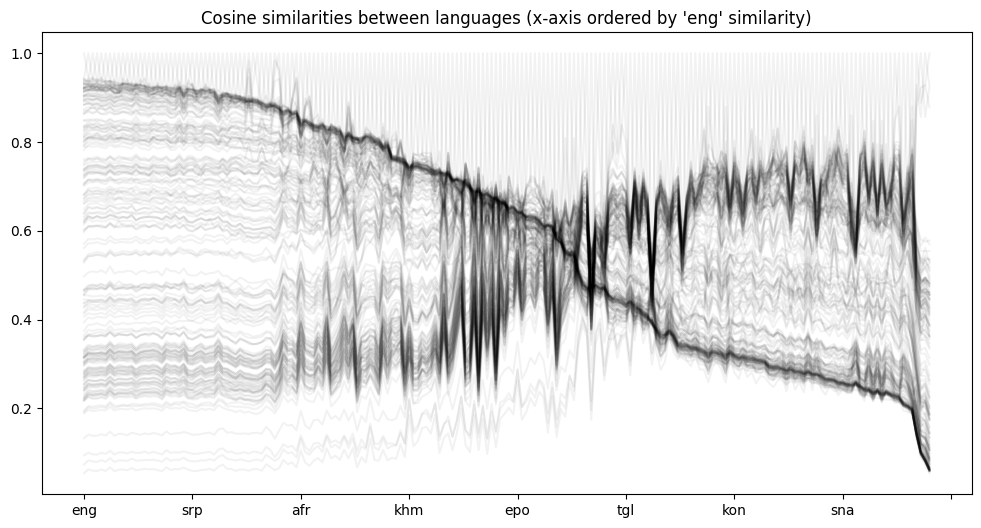

In [103]:
sort_lang='eng'

average_lang_similarity_df\
    .sort_values(sort_lang, ascending=False)\
    .plot(figsize=(12,6), 
          title=f"Cosine similarities between languages (x-axis ordered by '{sort_lang}' similarity)", 
          alpha=0.05, c='k', legend=None)

It seems like there are two clusters of languages!

What about variance?

In [95]:
variance_lang_similarity_df = pd.DataFrame(np.sqrt(pdist.var(axis=0)), columns=languages_rows_cols, index=languages_rows_cols)

<Axes: title={'center': "Var(cos_sim) between languages (x-axis ordered by 'eng' similarity)"}>

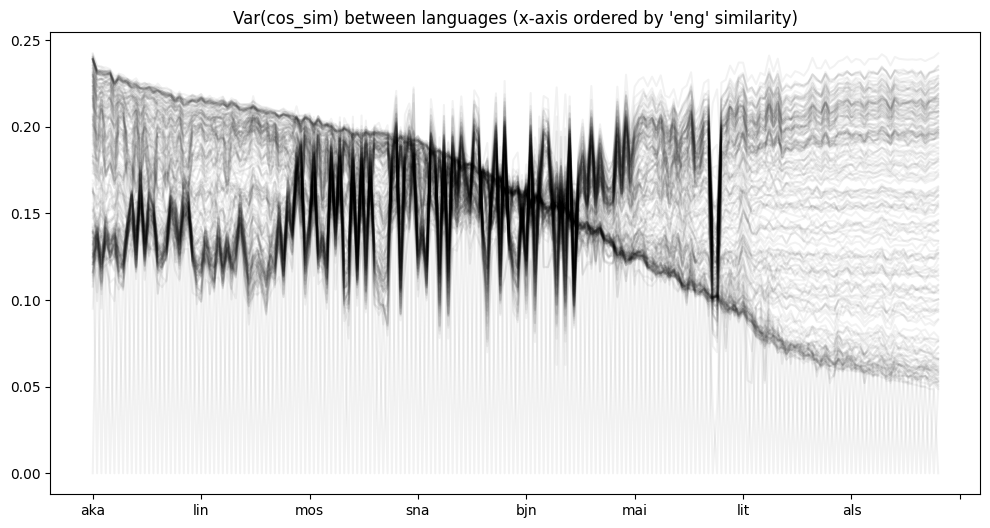

In [498]:
sort_lang='eng'

variance_lang_similarity_df\
    .sort_values(sort_lang, ascending=False)\
    .plot(figsize=(12,6), 
          title=f"Var(cos_sim) between languages (x-axis ordered by '{sort_lang}' similarity)", 
          alpha=0.05, c='k', legend=None)

#### NTREX

In [116]:
pdist_ntrex = np.stack([
    t for t in get_pairwise_distances_across_sentences(X_ntrex_sentences, ntrex_df, should_stack=False)
    if t.shape == (98, 98)
])

100%|███████████████████████████████████████████████████████████████████████| 2041/2041 [00:01<00:00, 1280.61it/s]


In [119]:
average_lang_similarity_df_ntrex = 1 - pd.DataFrame(pdist_ntrex.mean(axis=0), 
                                                    columns=languages_rows_cols_ntrex, 
                                                    index=languages_rows_cols_ntrex)

<Axes: title={'center': "Cosine similarities between languages (x-axis ordered by 'eng' similarity)"}>

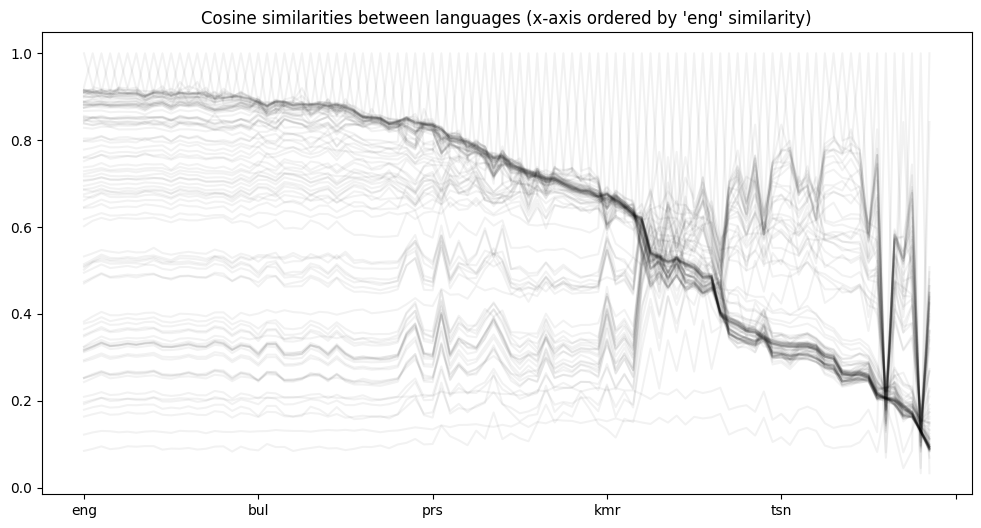

In [122]:
sort_lang='eng'

average_lang_similarity_df_ntrex\
    .sort_values(sort_lang, ascending=False)\
    .plot(figsize=(12,6), 
          title=f"Cosine similarities between languages (x-axis ordered by '{sort_lang}' similarity)", 
          alpha=0.05, c='k', legend=None)

In [121]:
variance_lang_similarity_df_ntrex = \
pd.DataFrame(
        np.sqrt(pdist.var(axis=0)), 
        columns=languages_rows_cols, 
        index=languages_rows_cols
)

<Axes: title={'center': "SD(cos_sim) between languages (x-axis ordered by 'eng' similarity)"}>

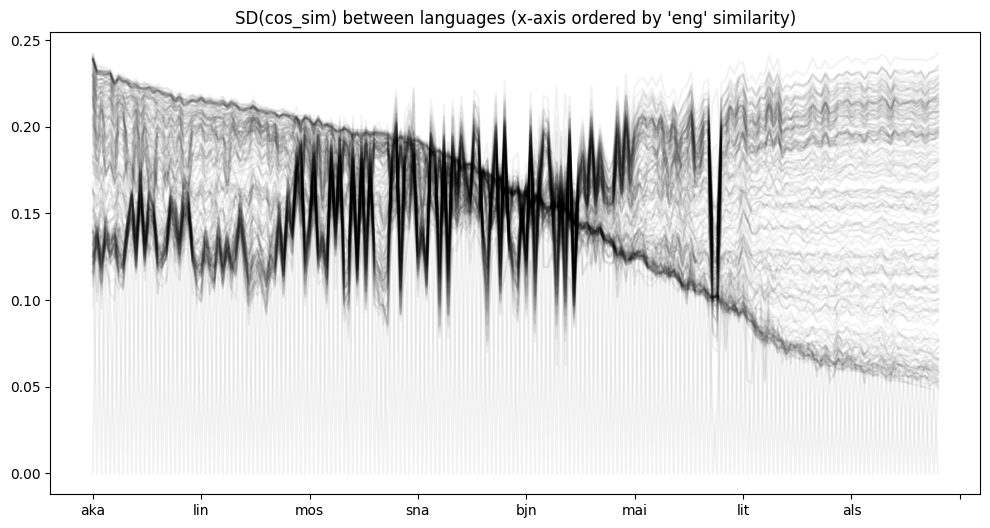

In [126]:
sort_lang='eng'

variance_lang_similarity_df_ntrex\
    .sort_values(sort_lang, ascending=False)\
    .plot(figsize=(12,6), 
          title=f"SD(cos_sim) between languages (x-axis ordered by '{sort_lang}' similarity)", 
          alpha=0.05, c='k', legend=None)

### Comparison

In [149]:
average_similarity_comparison = pd.concat([
    average_lang_similarity_df.loc[languages_rows_cols_ntrex, languages_rows_cols_ntrex].stack(),
    average_lang_similarity_df_ntrex.stack()
], axis=1).rename(columns={0: 'avg_sim_flores', 1: 'avg_sim_ntrex'})

In [157]:
average_similarity_comparison['ratio'] = average_similarity_comparison.avg_sim_flores / average_similarity_comparison.avg_sim_ntrex

In [163]:
average_similarity_comparison[average_similarity_comparison.ratio > 3]

avg_sim_flores  avg_sim_ntrex     ratio
hun vie        0.907238       0.131565  6.895721
    urd        0.824357       0.206590  3.990299
est vie        0.861519       0.135089  6.377403
    urd        0.808070       0.209621  3.854915
slk vie        0.910664       0.127957  7.116957
...                 ...            ...       ...
swe urd        0.824511       0.202025  4.081238
khm vie        0.749623       0.144485  5.188245
    urd        0.721081       0.219218  3.289325
kat vie        0.805432       0.146009  5.516312
    urd        0.796581       0.223256  3.568022

[272 rows x 3 columns]

<Axes: title={'center': 'Similarity ratio (FLORES/NTREX)'}, ylabel='Frequency'>

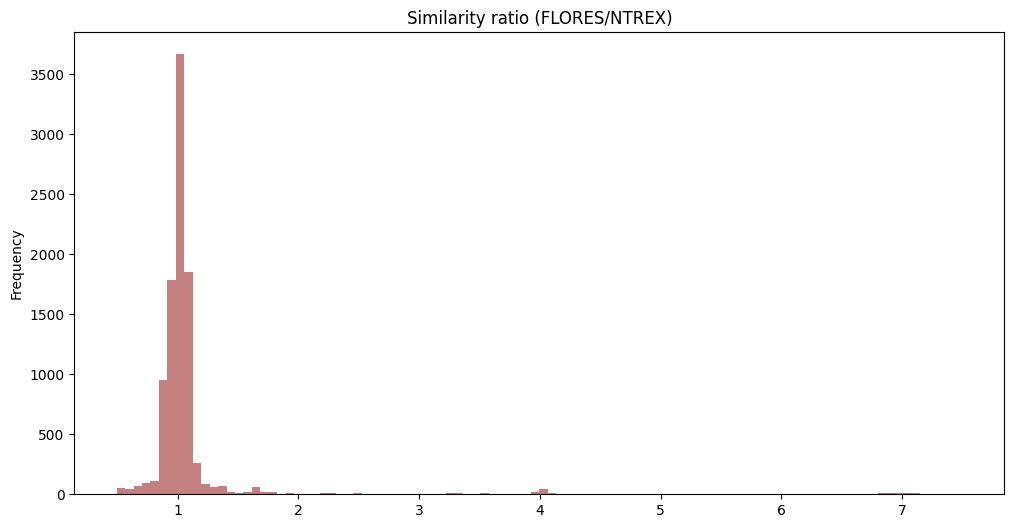

In [162]:
TITLE="Similarity ratio (FLORES/NTREX)"

average_similarity_comparison['ratio'].plot(
    kind='hist',
    title=TITLE,
    figsize=(12, 6),
    bins=100, 
    color='darkred',
    alpha=0.5
)

How reliable are these similarities?

<Axes: title={'center': 'Language similarity in each of the two corpora'}, xlabel='FLORES similarity', ylabel='NTREX similarity'>

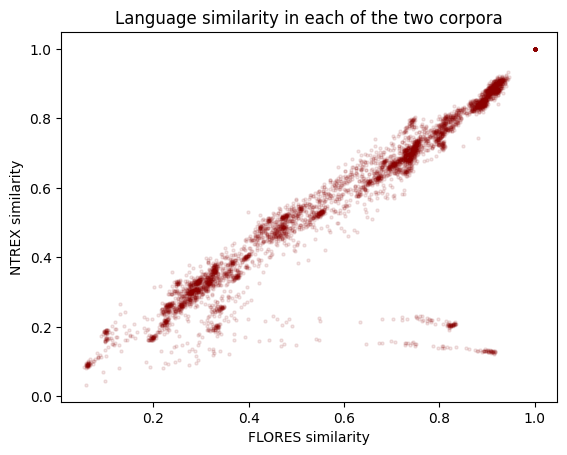

In [167]:
TITLE = "Language similarity in each of the two corpora"

average_similarity_comparison.plot(
    kind='scatter', 
    x='avg_sim_flores', 
    y='avg_sim_ntrex', 
    marker='.', 
    color='darkred', 
    alpha=0.05,
    title=TITLE,
    xlabel="FLORES similarity",
    ylabel="NTREX similarity"
)

## Let's benchmark retrieval

In [269]:
def cos_sim(x, y):
    num = x @ y
    denom = np.sqrt((x @ x)*(y @ y))
    return num/denom

In [265]:
def compare_sentence_in_lang_to_all(language, sentence_id):
    lang_mask = (flores_df.language == language)
    sent_id_mask = (flores_df.sentence_id == sentence_id)
    
    query_gsid = flores_df[lang_mask&sent_id_mask].global_sentence_id.tolist().pop()
    query_vec = global_sent_id_to_emb[query_gsid]
    
    out = flores_df.copy()
    out['similarity'] = out.global_sentence_id.apply(
        lambda gsid: cos_sim(global_sent_id_to_emb[gsid], query_vec)
    )
    
    return out.sort_values("similarity", ascending=False)

In [288]:
def compare_sentence_in_lang_to_all_ntrex(language, sentence_id):
    lang_mask = (ntrex_df.language == language)
    sent_id_mask = (ntrex_df.sentence_id == sentence_id)
    
    query_gsid = ntrex_df[lang_mask&sent_id_mask].global_sentence_id.tolist().pop()
    query_vec = global_sent_id_to_emb_ntrex[query_gsid]
    
    out = ntrex_df.copy()
    out['similarity'] = out.global_sentence_id.apply(
        lambda gsid: cos_sim(global_sent_id_to_emb_ntrex[gsid], query_vec)
    )
    
    return out.sort_values("similarity", ascending=False)

In [292]:
def compare_sentence_in_lang1_to_lang2(lang1, lang2, sentence_id):
    lang1_mask = (flores_df.language == lang1)
    lang2_mask = (flores_df.language == lang2)
    sent_id_mask = (flores_df.sentence_id == sentence_id)
    
    query_gsid = flores_df[lang1_mask&sent_id_mask].global_sentence_id.tolist().pop()
    query_vec = global_sent_id_to_emb[query_gsid]
    
    out = flores_df[lang2_mask].copy()
    out['similarity'] = out.global_sentence_id.apply(lambda gsid: cos_sim(global_sent_id_to_emb[gsid], query_vec))
    
    return out.sort_values("similarity", ascending=False)

In [293]:
def compare_sentence_in_lang1_to_lang2_ntrex(lang1, lang2, sentence_id):
    lang1_mask = (ntrex_df.language == lang1)
    lang2_mask = (ntrex_df.language == lang2)
    sent_id_mask = (ntrex_df.sentence_id == sentence_id)
    
    query_gsid = ntrex_df[lang1_mask&sent_id_mask].global_sentence_id.tolist().pop()
    query_vec = global_sent_id_to_emb_ntrex[query_gsid]
    
    out = ntrex_df[lang2_mask].copy()
    out['similarity'] = out.global_sentence_id.apply(lambda gsid: cos_sim(global_sent_id_to_emb_ntrex[gsid], query_vec))
    
    return out.sort_values("similarity", ascending=False)

In [361]:
compare_sentence_in_lang_to_all('dzo', 0).tail(-1).sentence_id.tolist().index(0)

475

In [313]:
import seaborn as sns

In [320]:
_ = average_lang_similarity_df.loc[languages_rows_cols_ntrex, languages_rows_cols_ntrex].stack().reset_index()

In [321]:
_.columns = ['language1', 'language2', 'similarity']

In [342]:
langs_sorted_by_avg_sim_ntrex = average_lang_similarity_df.loc[languages_rows_cols_ntrex, languages_rows_cols_ntrex].mean().sort_values(ascending=False).index.to_list()

In [345]:
_['language1'] = pd.Categorical(values=_.language1, categories=langs_sorted_by_avg_sim_ntrex, ordered=True)

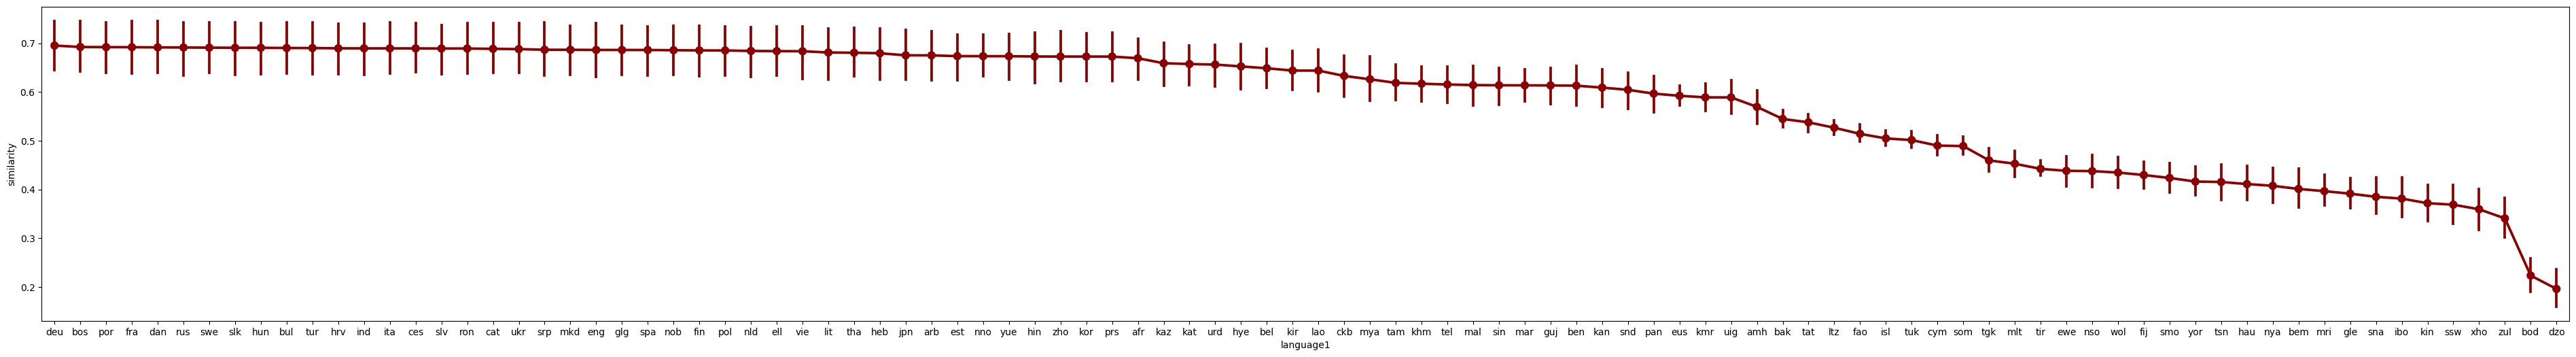

In [352]:
fig, ax = plt.subplots(figsize=(48, 6))
g = sns.pointplot(x='language1', data=_, y='similarity', ax=ax, color='darkred')

In [385]:
%%bash
export TOKENIZERS_PARALLELISM=true

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [440]:
# import pandas as pd
# import os


# def get_rankings(sid):
#     lang_rankings = compare_sentence_in_lang_to_all('fin', sid).groupby('language').similarity.max().sort_values().index.tolist()
#     return (sid, lang_rankings)

# rankings_against_fin = [get_rankings(sid) for sid in tqdm(range(flores_df.sentence_id.max()), total=flores_df.sentence_id.max())]